# Машинное обучение, ФКН ВШЭ

# Практическое задание 6. Бустинговое

## Общая информация

Дата выдачи: 12.12.2024

Мягкий дедлайн: 22.12.2024 23:59 MSK

Жёсткий дедлайн: 22.12.2024 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-06-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг. Однако с большой силой приходит и большая ответственность, так что заодно научимся, как его правильно готовить

In [1]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split

sns.set(style='darkgrid')
filterwarnings('ignore')

In [2]:
X = load_npz('x.npz')
y = np.load('y.npy')

In [3]:
y[y == 0] = -1

Разделим на обучающую, валидационную и тестовую выборки (оставьте `random_state=1337` для воспроизводимости).

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=1337)

X_train.shape, X_valid.shape, X_test.shape

((18825, 169), (2354, 169), (2353, 169))

---

## Задание 1. Базовый градиентный бустинг (4 балла)

Первая часть посвящена реализации собственного градиентного бустинга. Обращаем внимание, что пользоваться готовыми реализациями <font color='lightcoral'>**нельзя**</font>, если специально не оговорено. На все <font color='plum'>**вопросы**</font> должен быть <font color='plum'>**ответ**</font>. В заданиях есть референсы для параметров, которые нужно сделать, на случай, если объяснение из ноутбука непонятно, тогда советуем обратиться к соответствующей документации

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

Обязательные параметры:
 — `base_model_class` — класс базовой модели нашего бустинга
 — `base_model_params` — словарь с гиперпараметрами для базовой модели
 — `n_estimators` — какое количество базовых моделей нужно обучить
 — `learning_rate` — темп обучения, должен быть из полуинтервала $(0, 1]$

#### `fit`

В `fit` приходит выборка, на которой мы обучаем новые базовые модели

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на выборке (используем `loss_fn` для этого) и найти новую оптимальную гамму

После всего цикла обучения надо нарисовать график (если `plot=True`).

#### `partial_fit`

В `partial_fit` приходит обучающая выборка, на которую обучается новая базовая модель

#### `predict_proba`

В `predict_proba` приходит любая выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду

#### `plot_history`

В `plot_history` приходит любая выборка, для которой последовательно считаются значения функции потерь и/или любой метрики, которую вы хотите посчитать, путем последовательного применения базовых моделей. Можно делать сразу во время обучения, можно делать иначе

In [5]:
%load_ext autoreload

In [6]:
%autoreload 2

from boosting import Boosting

### Проверка кода

Estimator 1/100 - Train AUC: 0.9998 - Train Loss: 0.6689
Estimator 2/100 - Train AUC: 0.9998 - Train Loss: 0.6459
Estimator 3/100 - Train AUC: 0.9998 - Train Loss: 0.6240
Estimator 4/100 - Train AUC: 0.9998 - Train Loss: 0.6031
Estimator 5/100 - Train AUC: 0.9998 - Train Loss: 0.5833
Estimator 6/100 - Train AUC: 0.9998 - Train Loss: 0.5645
Estimator 7/100 - Train AUC: 0.9998 - Train Loss: 0.5465
Estimator 8/100 - Train AUC: 0.9998 - Train Loss: 0.5295
Estimator 9/100 - Train AUC: 0.9998 - Train Loss: 0.5132
Estimator 10/100 - Train AUC: 0.9998 - Train Loss: 0.4977
Estimator 11/100 - Train AUC: 0.9998 - Train Loss: 0.4830
Estimator 12/100 - Train AUC: 0.9998 - Train Loss: 0.4689
Estimator 13/100 - Train AUC: 0.9998 - Train Loss: 0.4555
Estimator 14/100 - Train AUC: 0.9998 - Train Loss: 0.4427
Estimator 15/100 - Train AUC: 0.9998 - Train Loss: 0.4305
Estimator 16/100 - Train AUC: 0.9998 - Train Loss: 0.4189
Estimator 17/100 - Train AUC: 0.9998 - Train Loss: 0.4077
Estimator 18/100 - Trai

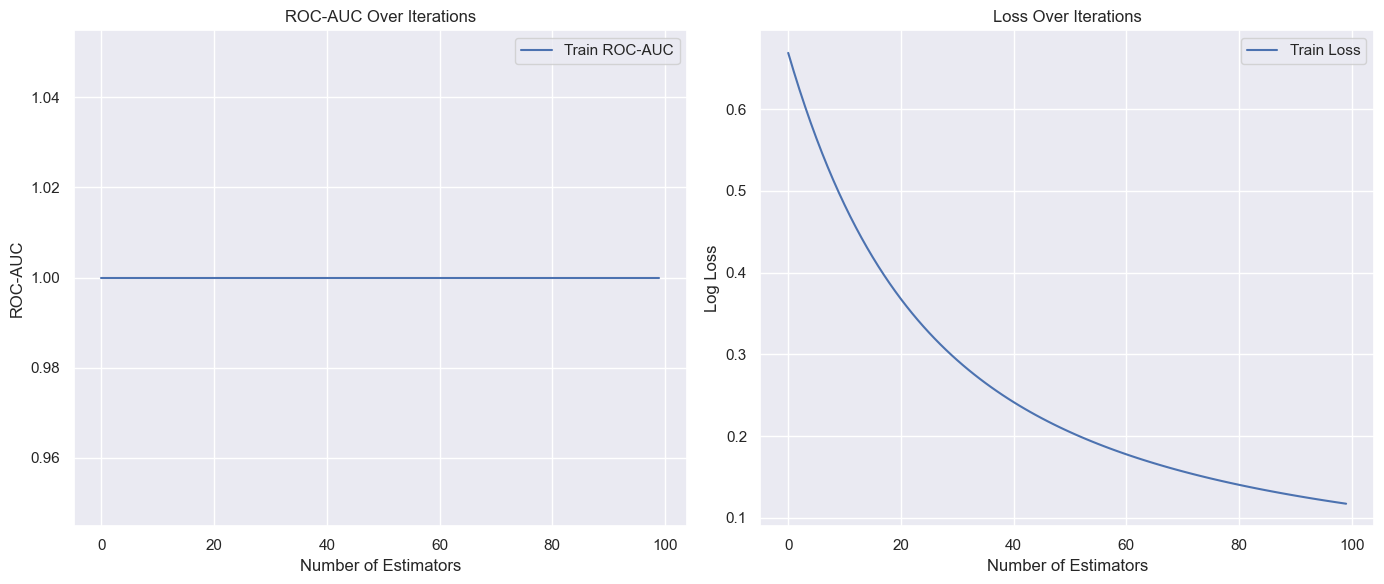

Train ROC-AUC 0.9998
Valid ROC-AUC 0.9137
Test ROC-AUC 0.9117


In [7]:
boosting = Boosting(n_estimators=100)

boosting.fit(X_train, y_train)
boosting.plot_history()

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(X_test).shape == (X_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(X_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

---

## Задание 2. Имплементация гиперпараметров (2.5 балла + 3.5 бонус)

Бустинг, как метод агрегации, предлагает несколько вариантов регуляризации безотносительно базовой модели. В этом пункте предлагается имплементировать часть из них. При необходимости можете обратиться к реализациям в вашей любимой библиотеке, там могут быть дополнительные пояснения и/или ссылки на оригинальные статьи

<font color='lightcoral'>**Важно!**</font> После добавления каждого параметра проверьте, как это повлияет на качество. Специально крутить параметры не нужно, но важно увидеть, что перформанс модели изменился, в худшую или в лучшую сторону, для этого какие-то параметры нужны, пусть и от балды, <font color='lightcoral'>**дефолтные параметры не подойдут**</font>, они скорее для референса. Лучше всего это видно по графикам обучения <font color='lightcoral'>**на трейне и валидации**</font>, рекомендуется смотрить именно на них

### 2.1. Борьба с переобучением (0.5 балла)

Как известно, бустинги бывают склонны к переобучению. Чтобы этого не допустить, можно контролировать процесс обучения и проверять критерий останова на валидации. Реализуйте такую процедуру, не забудьте, что всю предобработку, что вы будете делать для трейна, нужно будет повторить на валидации

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| <td colspan=3>`early_stopping_rounds`, `eval_set` |

Добавьте параметры:
- `early_stopping_rounds: int | None = 0` — число раундов для критерия останова. Если качество ухудшается на протяжении всех раундов подряд, останавливаем обучение
- `X_val`, `y_val` или `eval_set: Tuple[np.ndarray] | None = None` — валидацонная выборка, на которой будем проверять переобучение

Estimator 1/100 - Train AUC: 0.9998 - Train Loss: 0.6689 - Val AUC: 0.8428 - Val Loss: 0.6758
Estimator 2/100 - Train AUC: 0.9998 - Train Loss: 0.6459 - Val AUC: 0.9051 - Val Loss: 0.6593
Estimator 3/100 - Train AUC: 0.9998 - Train Loss: 0.6240 - Val AUC: 0.8931 - Val Loss: 0.6438
Estimator 4/100 - Train AUC: 0.9998 - Train Loss: 0.6031 - Val AUC: 0.8983 - Val Loss: 0.6293
Estimator 5/100 - Train AUC: 0.9998 - Train Loss: 0.5833 - Val AUC: 0.9081 - Val Loss: 0.6155
Estimator 6/100 - Train AUC: 0.9998 - Train Loss: 0.5645 - Val AUC: 0.9113 - Val Loss: 0.6025
Estimator 7/100 - Train AUC: 0.9998 - Train Loss: 0.5465 - Val AUC: 0.9092 - Val Loss: 0.5903
Estimator 8/100 - Train AUC: 0.9998 - Train Loss: 0.5295 - Val AUC: 0.9073 - Val Loss: 0.5789
Estimator 9/100 - Train AUC: 0.9998 - Train Loss: 0.5132 - Val AUC: 0.9143 - Val Loss: 0.5681
Estimator 10/100 - Train AUC: 0.9998 - Train Loss: 0.4977 - Val AUC: 0.9096 - Val Loss: 0.5578
Estimator 11/100 - Train AUC: 0.9998 - Train Loss: 0.4830 -

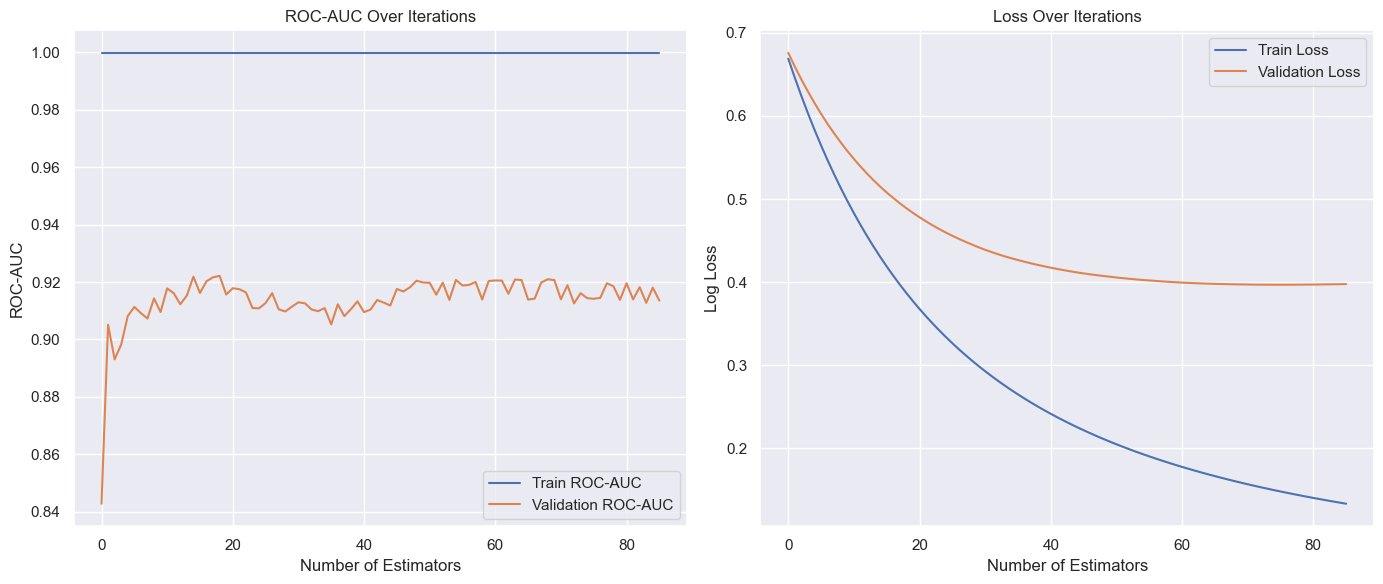

Лучшая итерация c улучшением валидации: 75
Наилучшая потеря при проверке: 0.3968772158695654
Окончательное количество установленных моделей: 86
Train ROC-AUC: 0.9998
Valid ROC-AUC: 0.9135
Test ROC-AUC 0.9107


In [8]:
boosting = Boosting(
    n_estimators=100,
    early_stopping_rounds=10,
    eval_set=(X_valid, y_valid)
)

boosting.fit(X_train, y_train, plot=True)

print("Лучшая итерация c улучшением валидации:", boosting.best_iteration_)
print("Наилучшая потеря при проверке:", boosting.best_score_)

print(f'Окончательное количество установленных моделей: {len(boosting.models)}')

print(f'Train ROC-AUC: {boosting.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC: {boosting.score(X_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

### Бонус. Бустинг линейных моделей (0.5 балла)

**<font color='plum'>Вопрос:** что произойдет при ансамблировании линейных моделей? Имеет ли это смысл?</font>

<font color='plum'>**Ответ:** Бустинг линейных моделей обычно не улучшает их производительность значительно, так как они ограничены в захвате сложных зависимостей. Поэтому в большинстве случаев ансамблирование линейных моделей не приносит ощутимых преимуществ. </font>

Давайте убедимся. Обучите бустинг, где в качестве базовой модели будет линейная регрессия. Обязательно сохраните историю функции потерь и зафиксируйте время обучения. Можно взять уже готовый из <font color='lightblue'>**XGBoost**</font>, но будьте готовы разобраться с тем, как оттуда достать историю обучения

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `XGBClassifier(booster="gblinear")` | — | — |

Estimator 1/50 - Train AUC: 0.9546 - Train Loss: 0.6794 - Val AUC: 0.9312 - Val Loss: 0.6799
Estimator 2/50 - Train AUC: 0.9544 - Train Loss: 0.6665 - Val AUC: 0.9314 - Val Loss: 0.6675
Estimator 3/50 - Train AUC: 0.9544 - Train Loss: 0.6536 - Val AUC: 0.9315 - Val Loss: 0.6551
Estimator 4/50 - Train AUC: 0.9541 - Train Loss: 0.6417 - Val AUC: 0.9313 - Val Loss: 0.6437
Estimator 5/50 - Train AUC: 0.9540 - Train Loss: 0.6303 - Val AUC: 0.9312 - Val Loss: 0.6327
Estimator 6/50 - Train AUC: 0.9540 - Train Loss: 0.6198 - Val AUC: 0.9313 - Val Loss: 0.6226
Estimator 7/50 - Train AUC: 0.9543 - Train Loss: 0.6092 - Val AUC: 0.9316 - Val Loss: 0.6125
Estimator 8/50 - Train AUC: 0.9543 - Train Loss: 0.5990 - Val AUC: 0.9315 - Val Loss: 0.6027
Estimator 9/50 - Train AUC: 0.9542 - Train Loss: 0.5894 - Val AUC: 0.9315 - Val Loss: 0.5936
Estimator 10/50 - Train AUC: 0.9543 - Train Loss: 0.5799 - Val AUC: 0.9316 - Val Loss: 0.5845
Estimator 11/50 - Train AUC: 0.9543 - Train Loss: 0.5712 - Val AUC: 0

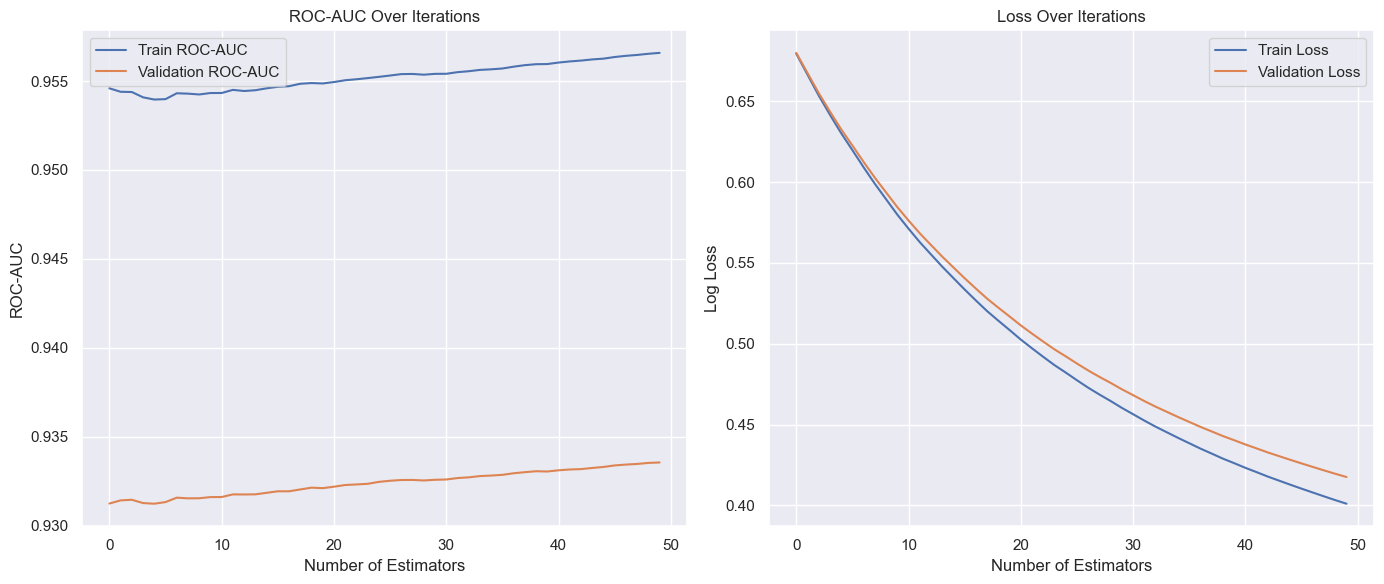

Train ROC-AUC: 0.9566
Valid ROC-AUC: 0.9336
Test  ROC-AUC:  0.9311
Время: 2.06 секунд


In [9]:
from sklearn.linear_model import SGDRegressor

lin_boosting = Boosting(
    base_model_class=SGDRegressor,
    base_model_params={
        "max_iter": 1,
        "tol": None,
        "fit_intercept": True
    },
    n_estimators=50,
    learning_rate=0.1,
    early_stopping_rounds=10,
    eval_set=(X_valid, y_valid)
)

import time
t0 = time.time()
lin_boosting.fit(X_train, y_train, plot=True)
t1 = time.time()

print(f"Train ROC-AUC: {lin_boosting.score(X_train, y_train):.4f}")
print(f"Valid ROC-AUC: {lin_boosting.score(X_valid, y_valid):.4f}")
print(f"Test  ROC-AUC:  {lin_boosting.score(X_test, y_test):.4f}")
print(f"Время: {t1 - t0:.2f} секунд")

Теперь возьмите `sklearn.linear_model.SGDClassifier` иобучите на тех же данных. Не забудьте вытащить историю функции потерь

In [10]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(
    loss='log_loss',
    penalty='l2',
    max_iter=1,
    warm_start=True,
    random_state=1337
)

train_loss_sgd = []
valid_loss_sgd = []

n_epochs = 50
t0 = time.time()

y_train_sgd = (y_train == 1).astype(int)
y_valid_sgd = (y_valid == 1).astype(int)

for epoch in range(n_epochs):
    sgd.fit(X_train, y_train_sgd)

    from sklearn.metrics import log_loss
    probs_train = sgd.predict_proba(X_train)
    probs_valid = sgd.predict_proba(X_valid)

    train_loss_sgd.append(log_loss(y_train_sgd, probs_train))
    valid_loss_sgd.append(log_loss(y_valid_sgd, probs_valid))

t1 = time.time()
print(f"SGDClassifier took {t1 - t0:.2f} seconds")

from sklearn.metrics import roc_auc_score
sgd_train_auc = roc_auc_score(y_train_sgd, sgd.predict_proba(X_train)[:,1])
sgd_valid_auc = roc_auc_score(y_valid_sgd, sgd.predict_proba(X_valid)[:,1])
print("SGD Train AUC:", sgd_train_auc)
print("SGD Valid AUC:", sgd_valid_auc)


SGDClassifier took 0.41 seconds
SGD Train AUC: 0.9543856388036915
SGD Valid AUC: 0.932498984301978


Покажите на одном графике изменение функции потерь для бустинга и SGD классификатора. Сравните следующие детали у бустинга и линейной модели:

- время обучения
- сходимость (как быстро, как стабильно и прочее)
- графики функции потерь на трейне и на валидации

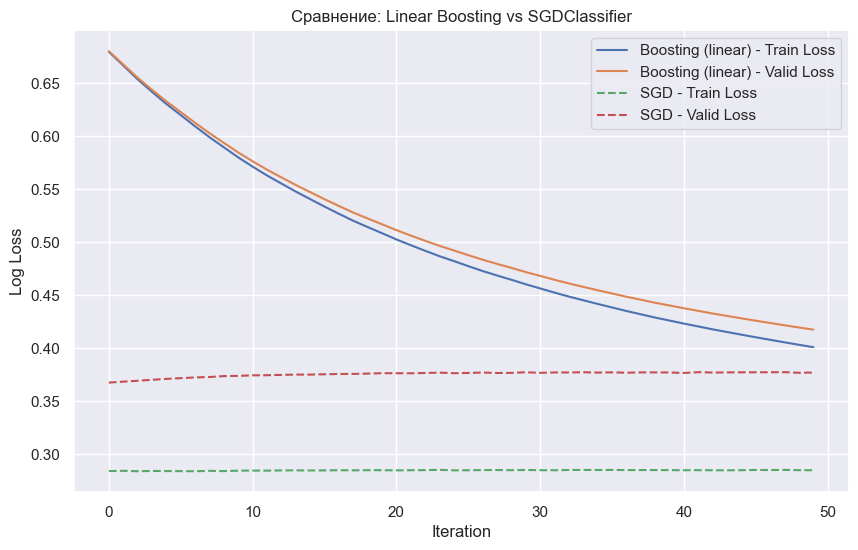

In [11]:
plt.figure(figsize=(10,6))
plt.plot(lin_boosting.history['train_loss'], label='Boosting (linear) - Train Loss')
plt.plot(lin_boosting.history['val_loss'],   label='Boosting (linear) - Valid Loss')
plt.plot(train_loss_sgd, '--', label='SGD - Train Loss')
plt.plot(valid_loss_sgd, '--', label='SGD - Valid Loss')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.legend()
plt.title("Сравнение: Linear Boosting vs SGDClassifier")
plt.show()

<font color='plum'>**Вопрос:** Какой вывод вы можете сделать?</font>

<font color='plum'>**Ответ:** SGDClassifier обучается быстрее (0.43 секунды против 2.07 секунд у бустинга), но бустинг лучше уменьшает ошибку на тренировочной и валидационной выборках. У бустинга лог-лосс плавно снижается, а у SGD почти не меняется.

Бустинг достигает чуть более высокой точности, но требует больше времени.</font>

### 2.2. Бутстрап (0.5 балла)
Как известно, при обучении базовых алгоритмов в беггинге, используется бутстрапированная выборка. Звучит хайпово, почему бы не попробовать сделать то же самое в бустинге?

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `subsample`, — | `subsample`, `bagging`| `subsample`, `bootstrap_type`|

Вам нужно реализовать параметры:
- `subsample: float | int = 1.0` — доля или число объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей). Соответствует бутстрапу типа `Bernoulli`. Каждый объект либо входит в подвыборку, либо нет
- `bagging_temperature: float | int = 1.0` — веса объектов, которые попадают в выборку. Соответствует бутстрапу типа `Bayesian`. Каждый объект имеет определенный вес $t$, на который впоследствии домножается по формуле $w = (-\log(X))^t$, где $X \sim {U[0, 1]}$, после чего попадает в выборку. Таким образом можно сделать симуляцию повторений
- `bootstrap_type: str | None = 'Bernoulli'` — тип бутстрапа

<font color='plum'>**Вопрос:** как бутстрап может помочь в обучении с точки зрения смещения, разброса и вообще?</font>

<font color='plum'>**Ответ:** Бутстрапирование уменьшает разброс модели, обучая каждую базовую модель на случайных подвыборках данных. Это делает композицию более устойчивой и снижает вероятность переобучения, улучшая обобщение. </font>

Estimator 1/100 - Train AUC: 0.9998 - Train Loss: 0.6689 - Val AUC: 0.8362 - Val Loss: 0.6761
Estimator 2/100 - Train AUC: 0.9998 - Train Loss: 0.6459 - Val AUC: 0.8710 - Val Loss: 0.6595
Estimator 3/100 - Train AUC: 0.9998 - Train Loss: 0.6240 - Val AUC: 0.8815 - Val Loss: 0.6441
Estimator 4/100 - Train AUC: 0.9998 - Train Loss: 0.6031 - Val AUC: 0.8869 - Val Loss: 0.6294
Estimator 5/100 - Train AUC: 0.9998 - Train Loss: 0.5833 - Val AUC: 0.8726 - Val Loss: 0.6158
Estimator 6/100 - Train AUC: 0.9998 - Train Loss: 0.5645 - Val AUC: 0.8842 - Val Loss: 0.6030
Estimator 7/100 - Train AUC: 0.9998 - Train Loss: 0.5466 - Val AUC: 0.8951 - Val Loss: 0.5908
Estimator 8/100 - Train AUC: 0.9998 - Train Loss: 0.5295 - Val AUC: 0.8915 - Val Loss: 0.5792
Estimator 9/100 - Train AUC: 0.9998 - Train Loss: 0.5133 - Val AUC: 0.9063 - Val Loss: 0.5681
Estimator 10/100 - Train AUC: 0.9998 - Train Loss: 0.4978 - Val AUC: 0.8983 - Val Loss: 0.5578
Estimator 11/100 - Train AUC: 0.9998 - Train Loss: 0.4830 -

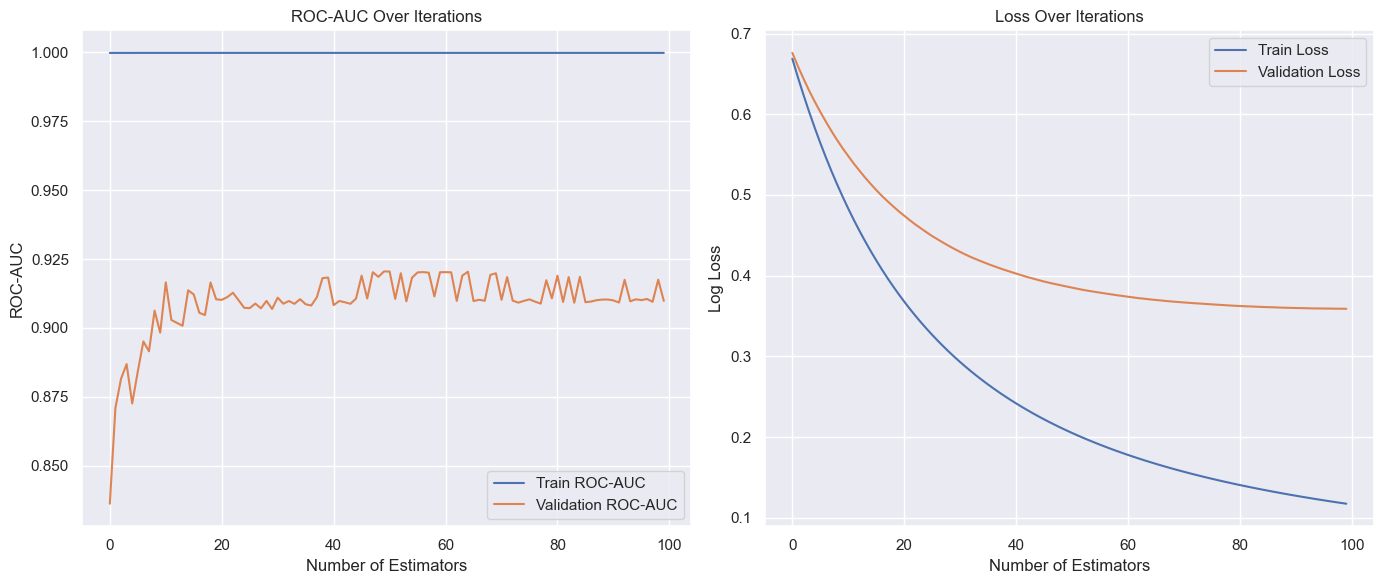

Train ROC-AUC 0.9998
Valid ROC-AUC 0.9098
Test ROC-AUC 0.9091


In [12]:
boosting = Boosting(
    n_estimators=100,
    subsample=0.8,
    bagging_temperature=1.0,
    bootstrap_type='Bayesian'
)

boosting.fit(X_train, y_train, X_val=X_valid, y_val=y_valid, plot=True)

print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(X_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')


### Бонус. GOSS (0.5 балла)

Заметим, что во время обучения не все объекты одинаково важны. Один из вариантов это исправить — ввести какие-то веса на объекты, однако можно пойти чуть хитрее. В <font color='lightgreen'>**LightGBM**</font> придумали подход [Gradient-based One-side Sampling](https://www.microsoft.com/en-us/research/wp-content/uploads/2017/11/lightgbm.pdf)

Давайте оценивать важность объектов в отдельный момент обучения нового дерева. Будем считать, какой антиградиент привносит каждый объект. Далее разобъем градиенты на 2 группы. Объекты с большими градиентами берутся все, с маленькими — только часть, по аналогии с бутстрапом, с отрицательными — выкидываются. И не забываем домножить на фактор, чтобы учесть выкинутые объекты. Подробнее в статье

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| — | `bagging='goss'`| `bootstrap_type='MVS'`|

Параметры, которые нужно сделать:

- `goss: bool | None = False` — GOSS бустинг или нет
- `goss_k: float | int = 0.2` — доля объектов, градиенты которых будем считать большими. Все остальное — маленькими
- `subsample: float | int = 0.3` — параметры сэмплинга для маленьких градиентов из пункта 2.1

Estimator 1/50 - Train AUC: 0.9252 - Train Loss: 0.6720 - Val AUC: 0.8384 - Val Loss: 0.6761
Estimator 2/50 - Train AUC: 0.9938 - Train Loss: 0.6516 - Val AUC: 0.8716 - Val Loss: 0.6603
Estimator 3/50 - Train AUC: 0.9993 - Train Loss: 0.6317 - Val AUC: 0.8757 - Val Loss: 0.6451
Estimator 4/50 - Train AUC: 0.9996 - Train Loss: 0.6120 - Val AUC: 0.8819 - Val Loss: 0.6312
Estimator 5/50 - Train AUC: 0.9997 - Train Loss: 0.5932 - Val AUC: 0.8963 - Val Loss: 0.6174
Estimator 6/50 - Train AUC: 0.9997 - Train Loss: 0.5752 - Val AUC: 0.9009 - Val Loss: 0.6045
Estimator 7/50 - Train AUC: 0.9998 - Train Loss: 0.5582 - Val AUC: 0.9053 - Val Loss: 0.5922
Estimator 8/50 - Train AUC: 0.9998 - Train Loss: 0.5419 - Val AUC: 0.9079 - Val Loss: 0.5804
Estimator 9/50 - Train AUC: 0.9998 - Train Loss: 0.5262 - Val AUC: 0.9084 - Val Loss: 0.5695
Estimator 10/50 - Train AUC: 0.9998 - Train Loss: 0.5113 - Val AUC: 0.9075 - Val Loss: 0.5592
Estimator 11/50 - Train AUC: 0.9998 - Train Loss: 0.4970 - Val AUC: 0

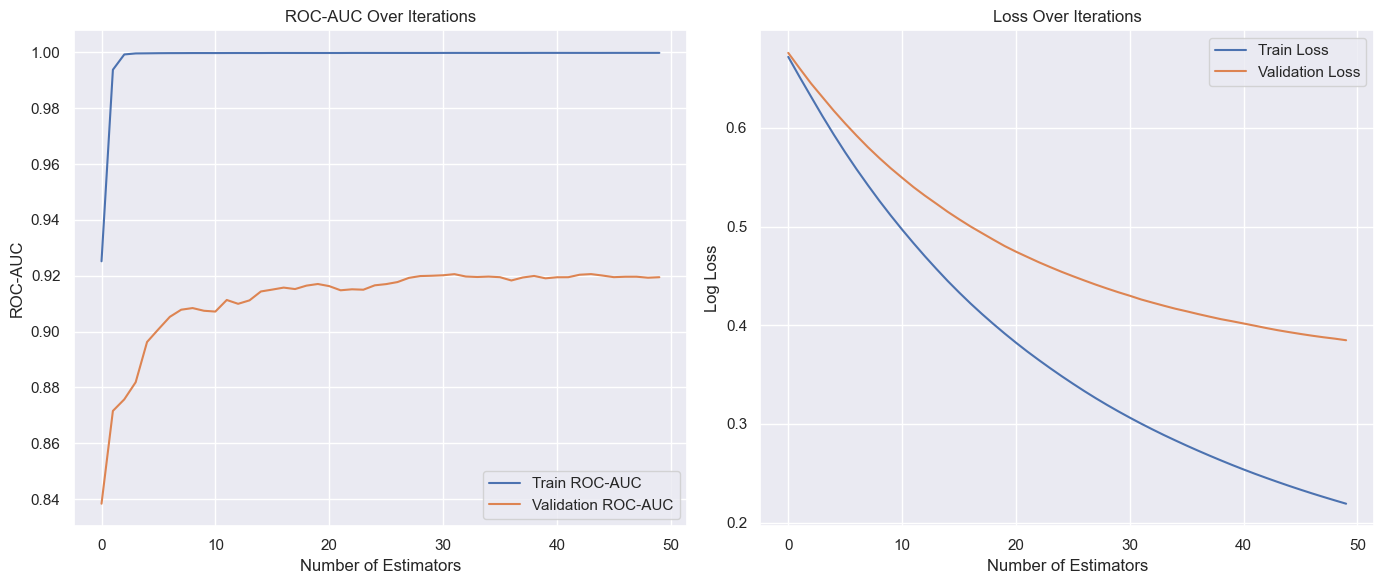


Train ROC-AUC: 0.9998
Valid ROC-AUC: 0.9195
Test  ROC-AUC:  0.9139


In [13]:
goss_boosting = Boosting(
    n_estimators=50,
    learning_rate=0.1,
    goss=True,
    goss_k=0.2,
    subsample=0.3,
    eval_set=(X_valid, y_valid),
    early_stopping_rounds=10
)

goss_boosting.fit(X_train, y_train, X_val=X_valid, y_val=y_valid, plot=True)

print(f"\nTrain ROC-AUC: {goss_boosting.score(X_train, y_train):.4f}")
print(f"Valid ROC-AUC: {goss_boosting.score(X_valid, y_valid):.4f}")
print(f"Test  ROC-AUC:  {goss_boosting.score(X_test,  y_test):.4f}")

### 2.3. Работа с признаками (1 балл)

1. Помимо выбора случайных объектов, есть идея выбирать случайное подмножество признаков, заложенная в Random Forest. Мотивация это делать точно та же самая, что и в бутстрапировании, за это будет отвечать `rsm`

2. С другой стороны, вместо того, чтобы выкидывать признаки, можно попробовать проредить их множество значений, применив бинаризацию. В идеале это стоит делать с датасетом до обучения модели, но не обязательно, можно, например, на этапе `fit`, а в `partial_fit` приходит уже квантизованный датасет. Для этого существует множество алгоритмов, мы предлагаем сделать два наиболее простых:

- $\text{Uniform}$. Значения признака $[\min f_i, \max f_i]$ отображаются в `nbins` отрезков одинаковой длины, которые полностью покрывают интервал
- $\text{Quantile}$. Тот же самый отрезок сортируется и бьется на `nbins` квантилей от 0 до 1

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `colsample_bytree`, `tree_method` | `colsample_bytree`, `max_bin`| `rsm`, `quantize(...)`|

Нужно добавить параметры:
- `rsm: float | int = 1.0` — доля или число признаков, участвующих в обучении модели. Каждый признак либо входит, либо не входит в пул, на котором обучается базовый алгоритм, по аналогии с бутстрапом Бернулли
- `quantization_type: str | None = None` — тип квантизации, если она есть
- `nbins: int = 255` — число бинов для квантизации. Игнорируем, если тип квантизации не указан

<font color='plum'>**Вопрос**: как квантизация поможет в обработке выбросов и нанов?</font>

<font color='plum'>**Ответ**: Квантизация сгруппирует значения признаков в фиксированные интервалы, что снижает влияние выбросов, поскольку экстремальные значения попадают в те же группы что и обычные. Это также упрощает обработку нанов, делая их более управляемыми для модели. </font>

<font color='plum'>**Вопрос**: можно ли просто заполнить наны каким-то числом? Имеет ли значение, что это за число (-1, -100, -1e32)?</font>

<font color='plum'>**Ответ**: Да, можно заполнить наны фиксированным числом. Важно выбрать уникальное значение, которое не встречается в данных, чтобы модель могла распознать его как пропущенное. </font>

Estimator 1/50 - Train AUC: 0.7591 - Train Loss: 0.6866 - Val AUC: 0.7365 - Val Loss: 0.6870
Estimator 2/50 - Train AUC: 0.8559 - Train Loss: 0.6771 - Val AUC: 0.8137 - Val Loss: 0.6786
Estimator 3/50 - Train AUC: 0.8502 - Train Loss: 0.6715 - Val AUC: 0.8138 - Val Loss: 0.6732
Estimator 4/50 - Train AUC: 0.8462 - Train Loss: 0.6650 - Val AUC: 0.8119 - Val Loss: 0.6672
Estimator 5/50 - Train AUC: 0.8718 - Train Loss: 0.6551 - Val AUC: 0.8274 - Val Loss: 0.6590
Estimator 6/50 - Train AUC: 0.9213 - Train Loss: 0.6406 - Val AUC: 0.8642 - Val Loss: 0.6475
Estimator 7/50 - Train AUC: 0.9200 - Train Loss: 0.6341 - Val AUC: 0.8648 - Val Loss: 0.6416
Estimator 8/50 - Train AUC: 0.9168 - Train Loss: 0.6284 - Val AUC: 0.8628 - Val Loss: 0.6364
Estimator 9/50 - Train AUC: 0.9181 - Train Loss: 0.6209 - Val AUC: 0.8635 - Val Loss: 0.6300
Estimator 10/50 - Train AUC: 0.9574 - Train Loss: 0.6032 - Val AUC: 0.8937 - Val Loss: 0.6168
Estimator 11/50 - Train AUC: 0.9617 - Train Loss: 0.5938 - Val AUC: 0

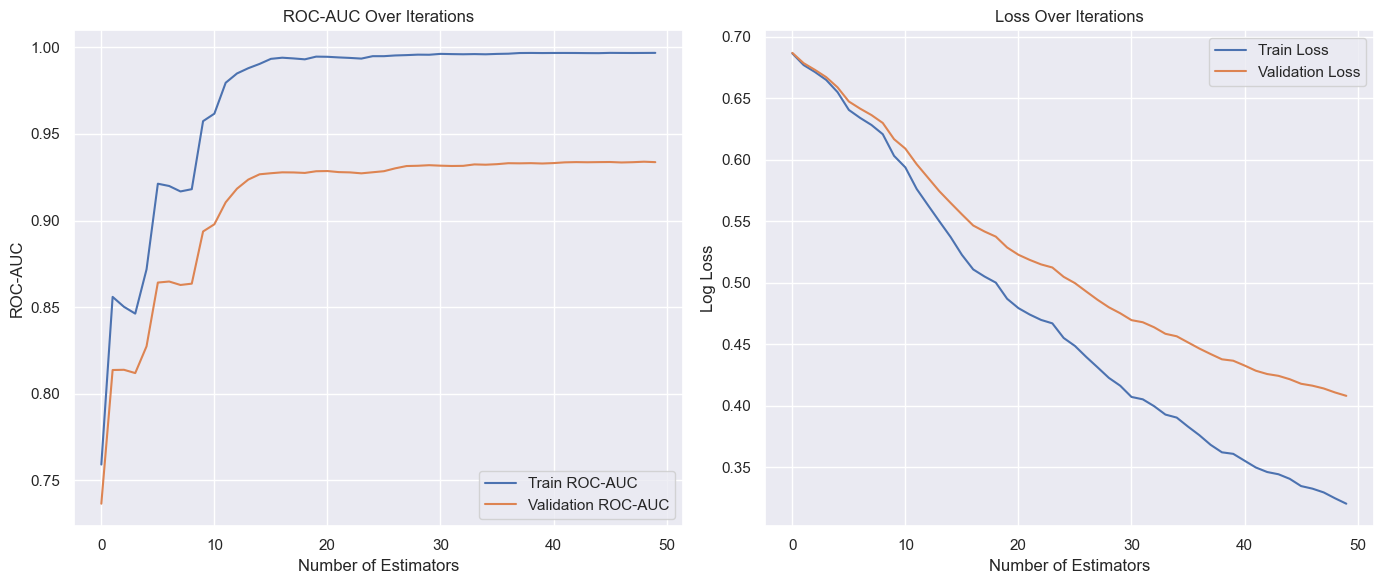


Train ROC-AUC: 0.9968
Valid ROC-AUC: 0.9337
Test ROC-AUC:  0.9311


In [14]:
boosting = Boosting(
    n_estimators=50,
    learning_rate=0.1,
    bootstrap_type='Bernoulli',
    subsample=0.8,
    rsm=0.5,
    quantization_type='Uniform',
    nbins=64,
    eval_set=(X_valid, y_valid)
)

boosting.fit(X_train, y_train, X_val=X_valid, y_val=y_valid, plot=True)

print(f"\nTrain ROC-AUC: {boosting.score(X_train, y_train):.4f}")
print(f"Valid ROC-AUC: {boosting.score(X_valid, y_valid):.4f}")
print(f"Test ROC-AUC:  {boosting.score(X_test,  y_test):.4f}")

### Бонус. Квантизация (1 балл)

В текущих имплементациях бустинга используются более сложные методы квантизации. К сожалению, способы выше страдают либо от неравноправности бинов — в каких-то объектов больше, в каких-то меньше, либо от того, что целевая переменная от бинов зависит опосредованно. Предлагается это исправить следующими способами:

1. $\text{MinEntropy}$. Это [один из методов](https://catboost.ai/docs/en/concepts/quantization), который используется для бинаризации в <font color='palegoldenrod'>**CatBoost**</font>, остальные на него очень похожи. Будем жадно набирать бины так, чтобы энтропия объектов внутри ($\sum_{i \in \text{bin}} x_i\log(x_i)$) была как можно меньше. Сделать такое разбиение руками непросто, но вам эта задача должна что-то напоминать
   
2. $\text{PiecewiseEncoding}$. Это относительно свежий метод для [табличных трансформеров](https://arxiv.org/pdf/2203.05556). Суть заключается в том, что бины для квантизации будем брать не с потолка, а именно те, что нужны для разбиения таргета. (В статье делается кодирование в вектор длины $T$, где $T$ число бинов, в нашем случае это излишне, бинов можно оставить столько же, но взять лмшь закодированную по формуле часть)

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| — | — | `feature_border_type="MinEntropy"` |

Нужно добавить опцию:

- `'MinEntropy'` для `quantization_type` — какую квантизацию используем

Реализуйте оба способа подсчета (или один, но тогда балл неполный) и сравните, удалось ли улучшить качество?

Estimator 1/50 - Train AUC: 0.9993 - Train Loss: 0.6694 - Val AUC: 0.8415 - Val Loss: 0.6763
Estimator 2/50 - Train AUC: 0.9993 - Train Loss: 0.6469 - Val AUC: 0.8998 - Val Loss: 0.6605
Estimator 3/50 - Train AUC: 0.9993 - Train Loss: 0.6254 - Val AUC: 0.8952 - Val Loss: 0.6455
Estimator 4/50 - Train AUC: 0.9993 - Train Loss: 0.6050 - Val AUC: 0.8969 - Val Loss: 0.6315
Estimator 5/50 - Train AUC: 0.9993 - Train Loss: 0.5856 - Val AUC: 0.9002 - Val Loss: 0.6183
Estimator 6/50 - Train AUC: 0.9993 - Train Loss: 0.5672 - Val AUC: 0.9031 - Val Loss: 0.6061
Estimator 7/50 - Train AUC: 0.9993 - Train Loss: 0.5496 - Val AUC: 0.8977 - Val Loss: 0.5945
Estimator 8/50 - Train AUC: 0.9993 - Train Loss: 0.5329 - Val AUC: 0.8945 - Val Loss: 0.5834
Estimator 9/50 - Train AUC: 0.9993 - Train Loss: 0.5170 - Val AUC: 0.9072 - Val Loss: 0.5731
Estimator 10/50 - Train AUC: 0.9993 - Train Loss: 0.5019 - Val AUC: 0.8970 - Val Loss: 0.5633
Estimator 11/50 - Train AUC: 0.9993 - Train Loss: 0.4874 - Val AUC: 0

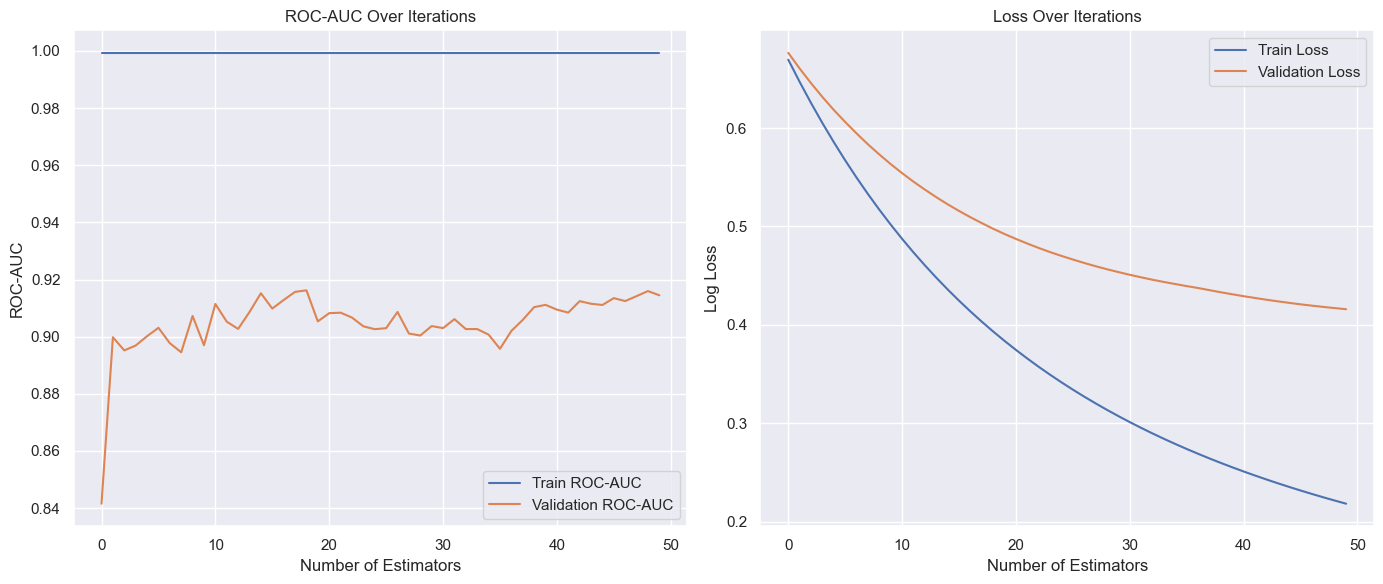

Estimator 1/50 - Train AUC: 0.9993 - Train Loss: 0.6694 - Val AUC: 0.8456 - Val Loss: 0.6761
Estimator 2/50 - Train AUC: 0.9993 - Train Loss: 0.6469 - Val AUC: 0.9016 - Val Loss: 0.6602
Estimator 3/50 - Train AUC: 0.9993 - Train Loss: 0.6254 - Val AUC: 0.8956 - Val Loss: 0.6453
Estimator 4/50 - Train AUC: 0.9993 - Train Loss: 0.6050 - Val AUC: 0.8980 - Val Loss: 0.6313
Estimator 5/50 - Train AUC: 0.9993 - Train Loss: 0.5856 - Val AUC: 0.8989 - Val Loss: 0.6181
Estimator 6/50 - Train AUC: 0.9993 - Train Loss: 0.5672 - Val AUC: 0.9047 - Val Loss: 0.6056
Estimator 7/50 - Train AUC: 0.9993 - Train Loss: 0.5496 - Val AUC: 0.8981 - Val Loss: 0.5940
Estimator 8/50 - Train AUC: 0.9993 - Train Loss: 0.5329 - Val AUC: 0.8953 - Val Loss: 0.5828
Estimator 9/50 - Train AUC: 0.9993 - Train Loss: 0.5170 - Val AUC: 0.9076 - Val Loss: 0.5725
Estimator 10/50 - Train AUC: 0.9993 - Train Loss: 0.5019 - Val AUC: 0.8972 - Val Loss: 0.5627
Estimator 11/50 - Train AUC: 0.9993 - Train Loss: 0.4874 - Val AUC: 0

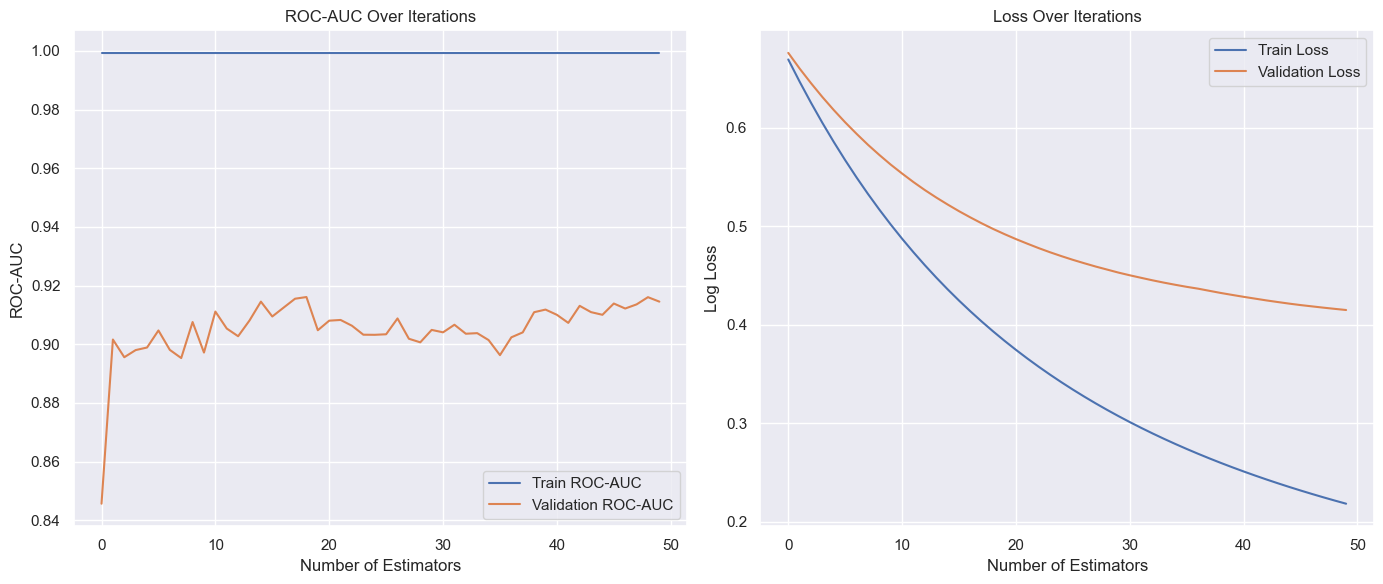

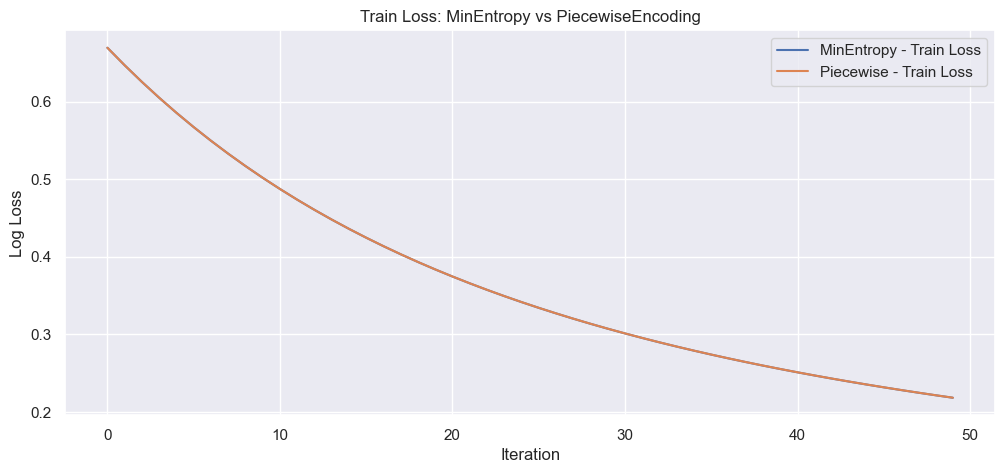

In [15]:
boosting_minent = Boosting(
    n_estimators=50,
    learning_rate=0.1,
    quantization_type='MinEntropy',
    nbins=64,
    eval_set=(X_valid, y_valid),
    early_stopping_rounds=10
)

import time
t0 = time.time()
boosting_minent.fit(X_train, y_train, X_val=X_valid, y_val=y_valid, plot=False)
t1 = time.time()

print("\n===== MinEntropy Quantization =====")
print(f"Train ROC-AUC: {boosting_minent.score(X_train, y_train):.4f}")
print(f"Valid ROC-AUC: {boosting_minent.score(X_valid, y_valid):.4f}")
print(f"Test  ROC-AUC:  {boosting_minent.score(X_test,  y_test):.4f}")
print(f"Time: {t1 - t0:.2f} seconds")

boosting_minent.plot_history()

boosting_piecewise = Boosting(
    n_estimators=50,
    learning_rate=0.1,
    quantization_type='PiecewiseEncoding',
    nbins=64,
    eval_set=(X_valid, y_valid),
    early_stopping_rounds=10
)

t0 = time.time()
boosting_piecewise.fit(X_train, y_train, X_val=X_valid, y_val=y_valid, plot=False)
t1 = time.time()

print("\n===== PiecewiseEncoding Quantization =====")
print(f"Train ROC-AUC: {boosting_piecewise.score(X_train, y_train):.4f}")
print(f"Valid ROC-AUC: {boosting_piecewise.score(X_valid, y_valid):.4f}")
print(f"Test  ROC-AUC:  {boosting_piecewise.score(X_test,  y_test):.4f}")
print(f"Time: {t1 - t0:.2f} seconds")

boosting_piecewise.plot_history()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.plot(boosting_minent.history['train_loss'], label='MinEntropy - Train Loss')
plt.plot(boosting_piecewise.history['train_loss'], label='Piecewise - Train Loss')
plt.title("Train Loss: MinEntropy vs PiecewiseEncoding")
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.legend()
plt.show()

### 2.4. Важность признаков (0.5 балла)

Поскольку наша базовая модель — это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными — иначе вы что-то сделали не так). Разумеется, способ не единственный, если хочется, посмотрите в документации

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `model.get_score()` | `lightgbm.importance()` | `model.get_feature_importance()` |

Допишите к бустингу:
- `feature_importances_` — атрибут, который возвращает важность признаков, согласно методу выше

Estimator 1/50 - Train AUC: 0.7593 - Train Loss: 0.6865 - Val AUC: 0.7364 - Val Loss: 0.6870
Estimator 2/50 - Train AUC: 0.8554 - Train Loss: 0.6771 - Val AUC: 0.8127 - Val Loss: 0.6786
Estimator 3/50 - Train AUC: 0.8486 - Train Loss: 0.6715 - Val AUC: 0.8118 - Val Loss: 0.6733
Estimator 4/50 - Train AUC: 0.8456 - Train Loss: 0.6650 - Val AUC: 0.8093 - Val Loss: 0.6674
Estimator 5/50 - Train AUC: 0.8708 - Train Loss: 0.6552 - Val AUC: 0.8263 - Val Loss: 0.6590
Estimator 6/50 - Train AUC: 0.9203 - Train Loss: 0.6407 - Val AUC: 0.8610 - Val Loss: 0.6476
Estimator 7/50 - Train AUC: 0.9195 - Train Loss: 0.6341 - Val AUC: 0.8632 - Val Loss: 0.6416
Estimator 8/50 - Train AUC: 0.9163 - Train Loss: 0.6284 - Val AUC: 0.8615 - Val Loss: 0.6364
Estimator 9/50 - Train AUC: 0.9174 - Train Loss: 0.6210 - Val AUC: 0.8619 - Val Loss: 0.6301
Estimator 10/50 - Train AUC: 0.9570 - Train Loss: 0.6033 - Val AUC: 0.8927 - Val Loss: 0.6167
Estimator 11/50 - Train AUC: 0.9615 - Train Loss: 0.5939 - Val AUC: 0

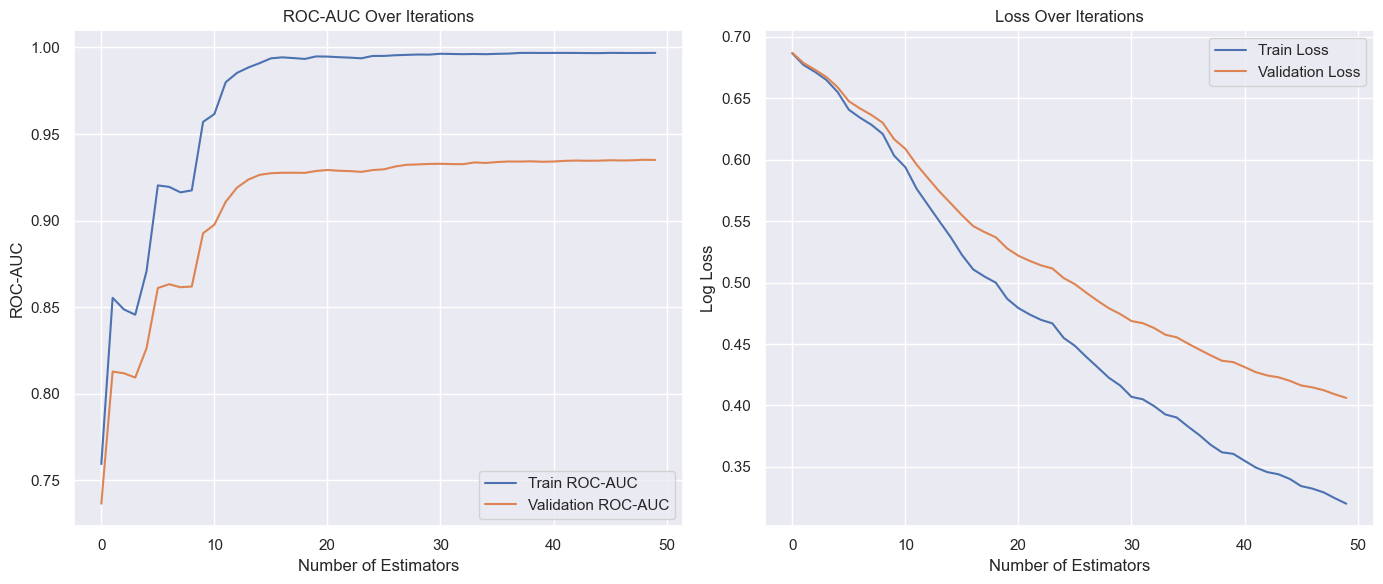


Train ROC-AUC: 0.9969
Valid ROC-AUC: 0.9350
Test ROC-AUC:  0.9319


In [16]:
boosting = Boosting(
    n_estimators=50,
    learning_rate=0.1,
    bootstrap_type='Bernoulli',
    subsample=0.8,
    rsm=0.5,
    quantization_type='Uniform',
    nbins=64,
    eval_set=(X_valid, y_valid)
)

boosting.fit(X_train, y_train, X_val=X_valid, y_val=y_valid, plot=True)

print(f"\nTrain ROC-AUC: {boosting.score(X_train, y_train):.4f}")
print(f"Valid ROC-AUC: {boosting.score(X_valid, y_valid):.4f}")
print(f"Test ROC-AUC:  {boosting.score(X_test,  y_test):.4f}")

Покажите, какие признаки оказались самыми важными

Feature importances (sum=1): [2.24403427e-03 8.73754242e-03 1.17329383e-02 2.08763161e-03
 1.90849538e-03 3.70296896e-03 9.83697692e-04 1.65502682e-03
 1.24579440e-03 5.44730070e-03 9.94065722e-03 1.95963714e-03
 3.62760234e-03 8.43835958e-04 6.39287352e-04 2.72049351e-03
 1.57838860e-04 8.73215888e-04 3.74926833e-04 3.65075513e-03
 7.42576264e-03 6.63634312e-03 2.75470580e-03 2.96108421e-03
 1.58499563e-02 3.73022745e-03 2.19956472e-03 1.11288838e-02
 8.64190176e-04 7.95287953e-04 3.00507798e-03 3.00608682e-03
 1.44245269e-03 1.57088962e-03 2.05187945e-03 3.81097849e-03
 9.65068560e-03 1.59707029e-03 3.57781776e-04 1.12515021e-04
 4.02140380e-04 0.00000000e+00 6.78120537e-04 4.35735582e-04
 5.50426678e-04 6.17379040e-04 6.50327187e-04 6.52947969e-04
 8.77286835e-04 1.02465963e-04 1.35804068e-03 1.60360559e-03
 7.22121815e-04 1.46278494e-03 5.58656867e-04 1.19007078e-03
 9.24239644e-04 1.60024302e-03 7.44500774e-04 1.70301976e-03
 8.86930829e-04 1.60809079e-03 2.88440984e-03 1.55532165

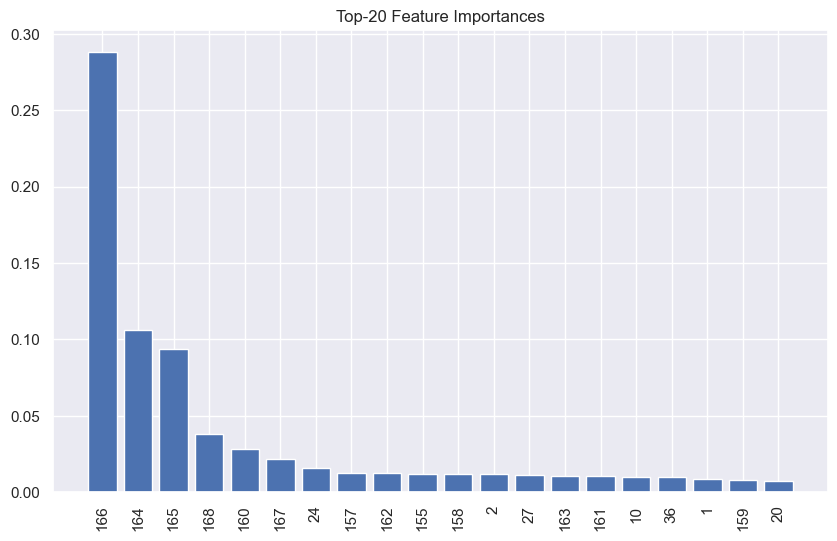

In [17]:
print("Feature importances (sum=1):", boosting.feature_importances_)

print("Number of features:", len(boosting.feature_importances_))

top_10 = np.argsort(boosting.feature_importances_)[::-1][:10]
print("TOP-10 important features:", top_10)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
idx_sorted = np.argsort(boosting.feature_importances_)[::-1]
plt.bar(range(20), boosting.feature_importances_[idx_sorted[:20]])
plt.xticks(range(20), idx_sorted[:20], rotation=90)
plt.title("Top-20 Feature Importances")
plt.show()

### Бонус. DART (1.5 балла)

Ранее мы обсуждали, что каждый базовый алгоритм пытается исправить ошибки всего предыдущего ансамбля. Из-за этого возникает неравноправие — каждая новая модель вносит все меньший и меньший вклад. Уверенные обучатели нейросетей знают, что это может привести к переобучению. Но выход есть, и выход этот [DART](https://arxiv.org/pdf/1505.01866)!

В DL есть такой вид регуляризации, как dropout, когда некоторые узлы нейросети со случайным шансом отключаются. Можно попробовать обобщить этот подход на случай бустингов и случайно выкидывать деревья из композиции во время обучения

1. Выбираем, какие деревья убрать. При подсчете антиградиента берем не весь ансамбль, а только ту часть, что осталась
2. Домножаем выходы дерева на $1/k$, где $k$ — число удаленных деревьев, чтобы учесть тот факт, что ансамбль был не весь. Тогда вклад отдельного дерева будет не настолько большим
3. Домножаем выходы выкинутых деревьев на $k/(k+1)$, чтобы масштабы выходов примерно совпадали

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `XGBClassifier(booster="dart")` | `LGBMClassifier(boosting_type="dart")` | — |

Параметры, которые нужно добавить:

- `dart: bool | None = False` — DART бустинг или нет
- `dropout_rate: int | float = 0.05` — доля деревьев, которую выкидываем во время обучения DART

Estimator 1/50 - Train AUC: 0.9998 - Train Loss: 0.6689 - Val AUC: 0.8495 - Val Loss: 0.6755
Estimator 2/50 - Train AUC: 0.9998 - Train Loss: 0.6689 - Val AUC: 0.8466 - Val Loss: 0.6843
Estimator 3/50 - Train AUC: 0.9998 - Train Loss: 0.6573 - Val AUC: 0.8945 - Val Loss: 0.6845
Estimator 4/50 - Train AUC: 0.9998 - Train Loss: 0.6405 - Val AUC: 0.8859 - Val Loss: 0.6804
Estimator 5/50 - Train AUC: 0.9998 - Train Loss: 0.6296 - Val AUC: 0.8858 - Val Loss: 0.6806
Estimator 6/50 - Train AUC: 0.9998 - Train Loss: 0.6194 - Val AUC: 0.8912 - Val Loss: 0.6810
Estimator 7/50 - Train AUC: 0.9998 - Train Loss: 0.6092 - Val AUC: 0.8786 - Val Loss: 0.6812
Estimator 8/50 - Train AUC: 0.9998 - Train Loss: 0.6153 - Val AUC: 0.8515 - Val Loss: 0.6915
Estimator 9/50 - Train AUC: 0.9998 - Train Loss: 0.6049 - Val AUC: 0.8559 - Val Loss: 0.6916
Estimator 10/50 - Train AUC: 0.9998 - Train Loss: 0.5920 - Val AUC: 0.8464 - Val Loss: 0.6894
Estimator 11/50 - Train AUC: 0.9998 - Train Loss: 0.5760 - Val AUC: 0

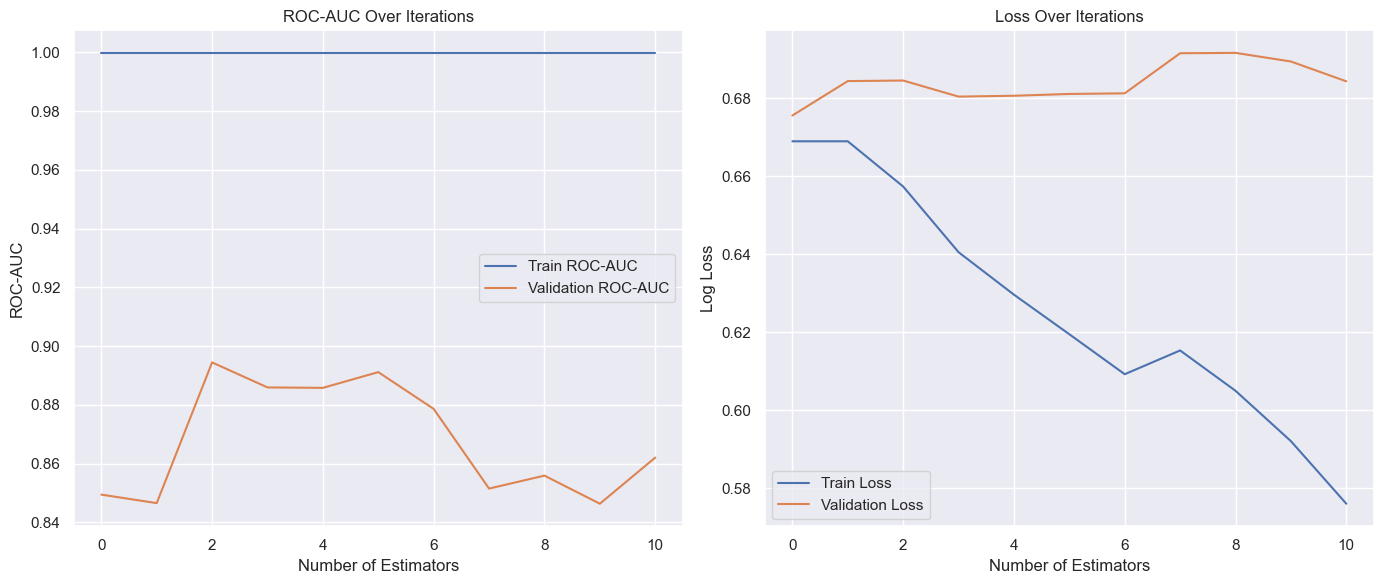


=== DART Mode ===
Время обучения: 3.89 секунд
Train ROC-AUC: 0.9998
Valid ROC-AUC: 0.9038
Test  ROC-AUC: 0.9036


In [18]:
from boosting import Boosting
import time

dart_boosting = Boosting(
    dart=True,
    dropout_rate=0.1,
    n_estimators=50,
    learning_rate=0.1,
    eval_set=(X_valid, y_valid),
    early_stopping_rounds=10
)

t0 = time.time()
dart_boosting.fit(X_train, y_train, X_val=X_valid, y_val=y_valid, plot=True)
t1 = time.time()

print("\n=== DART Mode ===")
print(f"Время обучения: {t1 - t0:.2f} секунд")

print(f"Train ROC-AUC: {dart_boosting.score(X_train, y_train):.4f}")
print(f"Valid ROC-AUC: {dart_boosting.score(X_valid, y_valid):.4f}")
print(f"Test  ROC-AUC: {dart_boosting.score(X_test,  y_test):.4f}")

------

## Задание 3. Оптимизация (3.5 балла + 0.5 бонус)

Теперь давайте подумаем, как же правильно применять бустинги. Нас интересует: какие бустинги вообще бывают, как их правильно тюнить, и как интерпретировать

Оптимизация моделей с большим числом гиперпараметров это сложное дело. Нетрудно догадаться, что в случае, когда параметров $m$, сложность перебора в самом худшем случае будет порядка $n^m$. У бустингов, хотя на самом деле не только, эта проблема стоит особенно остро. Подумаем, как это делать умнее

### 3.1. Знакомство с optuna (1 балл)

Для эффективного подбора гиперпараметров существует несколько решений, основанных на байесовской оптимизации. В этом задании предлагается познакомиться с библиотекой [optuna](https://optuna.org/), которая делает перебор гиперпараметров легким и приятным, а также сохраняет всю историю экспериментов в одно место за вас

Подберите на валидации оптимальные значения следующих гиперпараметров для вашей реализации бустинга:
- `max_depth`
- `n_estimators`
- `learning_rate`
- любые другие параметры, которые вам понравились

Заметим, что оптуна это крайне гибкая библиотека, в которой можно реализовать абсолютно любую логику, которую пожелаете. За вас там есть лишь выбор модели. Чтобы не плодить несколько `objective`, можно слегка менять тело функции, например, добавить опциональные параметры, но шаблоном пользоваться не обязательно, как обычно

Подберите диапазон параметров самостоятельно, не забывайте фиксировать сид (нет, его не нужно перебирать). Сохраните и покажите оптимальный набор параметров. Сравните графики функций потерь для оптимального и дефолтного бустингов. Покажите, какие параметры дали наибольший прирост (для этого придется почитать документацию оптуны)

In [19]:
import optuna

def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 10, 150)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.5, log=True)
    max_depth = trial.suggest_int("max_depth", 2, 10)

    subsample = trial.suggest_float("subsample", 0.5, 1.0)
    rsm = trial.suggest_float("rsm", 0.5, 1.0)

    from boosting import Boosting
    boosting = Boosting(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        eval_set=(X_valid, y_valid),
        early_stopping_rounds=10,
        bootstrap_type='Bernoulli',
        subsample=subsample,
        rsm=rsm,
        base_model_params={
            "max_depth": max_depth,
        }
    )

    boosting.fit(X_train, y_train, plot=False)

    val_auc = boosting.score(X_valid, y_valid)

    return -val_auc

In [20]:
study = optuna.create_study(
    study_name="my_custom_boosting",
    direction="minimize",
)

study.optimize(objective, n_trials=30)

[I 2024-12-24 01:51:12,670] A new study created in memory with name: my_custom_boosting


Estimator 1/15 - Train AUC: 0.8038 - Train Loss: 0.6899 - Val AUC: 0.7997 - Val Loss: 0.6899
Estimator 2/15 - Train AUC: 0.9400 - Train Loss: 0.6843 - Val AUC: 0.9158 - Val Loss: 0.6846
Estimator 3/15 - Train AUC: 0.9469 - Train Loss: 0.6819 - Val AUC: 0.9194 - Val Loss: 0.6824
Estimator 4/15 - Train AUC: 0.9534 - Train Loss: 0.6766 - Val AUC: 0.9270 - Val Loss: 0.6774
Estimator 5/15 - Train AUC: 0.9552 - Train Loss: 0.6726 - Val AUC: 0.9280 - Val Loss: 0.6736
Estimator 6/15 - Train AUC: 0.9512 - Train Loss: 0.6686 - Val AUC: 0.9226 - Val Loss: 0.6698
Estimator 7/15 - Train AUC: 0.9506 - Train Loss: 0.6666 - Val AUC: 0.9227 - Val Loss: 0.6678
Estimator 8/15 - Train AUC: 0.9493 - Train Loss: 0.6648 - Val AUC: 0.9228 - Val Loss: 0.6661
Estimator 9/15 - Train AUC: 0.9462 - Train Loss: 0.6625 - Val AUC: 0.9188 - Val Loss: 0.6639
Estimator 10/15 - Train AUC: 0.9545 - Train Loss: 0.6568 - Val AUC: 0.9258 - Val Loss: 0.6586


[I 2024-12-24 01:51:13,350] Trial 0 finished with value: -0.9336763159974235 and parameters: {'n_estimators': 15, 'learning_rate': 0.03818439264723237, 'max_depth': 5, 'subsample': 0.6244894436813289, 'rsm': 0.6253451792583022}. Best is trial 0 with value: -0.9336763159974235.


Estimator 11/15 - Train AUC: 0.9531 - Train Loss: 0.6541 - Val AUC: 0.9255 - Val Loss: 0.6561
Estimator 12/15 - Train AUC: 0.9567 - Train Loss: 0.6486 - Val AUC: 0.9295 - Val Loss: 0.6509
Estimator 13/15 - Train AUC: 0.9590 - Train Loss: 0.6438 - Val AUC: 0.9316 - Val Loss: 0.6464
Estimator 14/15 - Train AUC: 0.9599 - Train Loss: 0.6384 - Val AUC: 0.9332 - Val Loss: 0.6413
Estimator 15/15 - Train AUC: 0.9607 - Train Loss: 0.6332 - Val AUC: 0.9337 - Val Loss: 0.6365
Estimator 1/65 - Train AUC: 0.8425 - Train Loss: 0.6658 - Val AUC: 0.8182 - Val Loss: 0.6673
Estimator 2/65 - Train AUC: 0.9572 - Train Loss: 0.6224 - Val AUC: 0.9244 - Val Loss: 0.6277
Estimator 3/65 - Train AUC: 0.9565 - Train Loss: 0.6130 - Val AUC: 0.9247 - Val Loss: 0.6182
Estimator 4/65 - Train AUC: 0.9533 - Train Loss: 0.6025 - Val AUC: 0.9215 - Val Loss: 0.6082
Estimator 5/65 - Train AUC: 0.9531 - Train Loss: 0.5843 - Val AUC: 0.9211 - Val Loss: 0.5917
Estimator 6/65 - Train AUC: 0.9567 - Train Loss: 0.5588 - Val AUC

[I 2024-12-24 01:51:17,626] Trial 1 finished with value: -0.943721549480258 and parameters: {'n_estimators': 65, 'learning_rate': 0.2835108898626137, 'max_depth': 9, 'subsample': 0.7895916913071577, 'rsm': 0.553032382280668}. Best is trial 1 with value: -0.943721549480258.


Estimator 1/21 - Train AUC: 0.7889 - Train Loss: 0.6899 - Val AUC: 0.7735 - Val Loss: 0.6900
Estimator 2/21 - Train AUC: 0.9372 - Train Loss: 0.6839 - Val AUC: 0.9121 - Val Loss: 0.6844
Estimator 3/21 - Train AUC: 0.9374 - Train Loss: 0.6826 - Val AUC: 0.9134 - Val Loss: 0.6830
Estimator 4/21 - Train AUC: 0.9356 - Train Loss: 0.6810 - Val AUC: 0.9143 - Val Loss: 0.6814
Estimator 5/21 - Train AUC: 0.9387 - Train Loss: 0.6780 - Val AUC: 0.9148 - Val Loss: 0.6785
Estimator 6/21 - Train AUC: 0.9334 - Train Loss: 0.6737 - Val AUC: 0.9087 - Val Loss: 0.6745
Estimator 7/21 - Train AUC: 0.9277 - Train Loss: 0.6716 - Val AUC: 0.9039 - Val Loss: 0.6724
Estimator 8/21 - Train AUC: 0.9204 - Train Loss: 0.6697 - Val AUC: 0.8983 - Val Loss: 0.6706
Estimator 9/21 - Train AUC: 0.9188 - Train Loss: 0.6672 - Val AUC: 0.8954 - Val Loss: 0.6681
Estimator 10/21 - Train AUC: 0.9395 - Train Loss: 0.6612 - Val AUC: 0.9140 - Val Loss: 0.6625
Estimator 11/21 - Train AUC: 0.9367 - Train Loss: 0.6583 - Val AUC: 0

[I 2024-12-24 01:51:18,568] Trial 2 finished with value: -0.9295456776761147 and parameters: {'n_estimators': 21, 'learning_rate': 0.04193141789025127, 'max_depth': 4, 'subsample': 0.8682644501111699, 'rsm': 0.5734947114259608}. Best is trial 1 with value: -0.943721549480258.


Estimator 21/21 - Train AUC: 0.9546 - Train Loss: 0.6088 - Val AUC: 0.9295 - Val Loss: 0.6132
Estimator 1/53 - Train AUC: 0.5984 - Train Loss: 0.6919 - Val AUC: 0.6001 - Val Loss: 0.6919
Estimator 2/53 - Train AUC: 0.7446 - Train Loss: 0.6900 - Val AUC: 0.7386 - Val Loss: 0.6900
Estimator 3/53 - Train AUC: 0.7596 - Train Loss: 0.6889 - Val AUC: 0.7492 - Val Loss: 0.6889
Estimator 4/53 - Train AUC: 0.7548 - Train Loss: 0.6877 - Val AUC: 0.7453 - Val Loss: 0.6878
Estimator 5/53 - Train AUC: 0.7996 - Train Loss: 0.6853 - Val AUC: 0.7835 - Val Loss: 0.6854
Estimator 6/53 - Train AUC: 0.8436 - Train Loss: 0.6819 - Val AUC: 0.8261 - Val Loss: 0.6822
Estimator 7/53 - Train AUC: 0.8527 - Train Loss: 0.6801 - Val AUC: 0.8350 - Val Loss: 0.6805
Estimator 8/53 - Train AUC: 0.8531 - Train Loss: 0.6786 - Val AUC: 0.8362 - Val Loss: 0.6789
Estimator 9/53 - Train AUC: 0.8527 - Train Loss: 0.6767 - Val AUC: 0.8354 - Val Loss: 0.6771
Estimator 10/53 - Train AUC: 0.9144 - Train Loss: 0.6717 - Val AUC: 0

[I 2024-12-24 01:51:20,634] Trial 3 finished with value: -0.9253875017659975 and parameters: {'n_estimators': 53, 'learning_rate': 0.03615028025008675, 'max_depth': 3, 'subsample': 0.5811332993854438, 'rsm': 0.5090893566464244}. Best is trial 1 with value: -0.943721549480258.


Estimator 1/13 - Train AUC: 0.8092 - Train Loss: 0.6919 - Val AUC: 0.7934 - Val Loss: 0.6919
Estimator 2/13 - Train AUC: 0.9488 - Train Loss: 0.6896 - Val AUC: 0.9194 - Val Loss: 0.6898
Estimator 3/13 - Train AUC: 0.9522 - Train Loss: 0.6886 - Val AUC: 0.9203 - Val Loss: 0.6888
Estimator 4/13 - Train AUC: 0.9619 - Train Loss: 0.6861 - Val AUC: 0.9287 - Val Loss: 0.6866
Estimator 5/13 - Train AUC: 0.9597 - Train Loss: 0.6844 - Val AUC: 0.9263 - Val Loss: 0.6850
Estimator 6/13 - Train AUC: 0.9555 - Train Loss: 0.6826 - Val AUC: 0.9226 - Val Loss: 0.6834
Estimator 7/13 - Train AUC: 0.9509 - Train Loss: 0.6809 - Val AUC: 0.9171 - Val Loss: 0.6818
Estimator 8/13 - Train AUC: 0.9575 - Train Loss: 0.6785 - Val AUC: 0.9250 - Val Loss: 0.6795
Estimator 9/13 - Train AUC: 0.9611 - Train Loss: 0.6761 - Val AUC: 0.9285 - Val Loss: 0.6774
Estimator 10/13 - Train AUC: 0.9631 - Train Loss: 0.6737 - Val AUC: 0.9309 - Val Loss: 0.6751
Estimator 11/13 - Train AUC: 0.9615 - Train Loss: 0.6721 - Val AUC: 0

[I 2024-12-24 01:51:21,351] Trial 4 finished with value: -0.9324818231959087 and parameters: {'n_estimators': 13, 'learning_rate': 0.014766366621551383, 'max_depth': 6, 'subsample': 0.656780936901701, 'rsm': 0.7776816334143231}. Best is trial 1 with value: -0.943721549480258.


Estimator 13/13 - Train AUC: 0.9647 - Train Loss: 0.6676 - Val AUC: 0.9325 - Val Loss: 0.6694
Estimator 1/118 - Train AUC: 0.7525 - Train Loss: 0.6719 - Val AUC: 0.7427 - Val Loss: 0.6727
Estimator 2/118 - Train AUC: 0.9257 - Train Loss: 0.6350 - Val AUC: 0.9014 - Val Loss: 0.6375
Estimator 3/118 - Train AUC: 0.9324 - Train Loss: 0.6225 - Val AUC: 0.9057 - Val Loss: 0.6254
Estimator 4/118 - Train AUC: 0.9316 - Train Loss: 0.5927 - Val AUC: 0.9054 - Val Loss: 0.5974
Estimator 5/118 - Train AUC: 0.9333 - Train Loss: 0.5758 - Val AUC: 0.9058 - Val Loss: 0.5815
Estimator 6/118 - Train AUC: 0.9342 - Train Loss: 0.5603 - Val AUC: 0.9074 - Val Loss: 0.5668
Estimator 7/118 - Train AUC: 0.9304 - Train Loss: 0.5514 - Val AUC: 0.9036 - Val Loss: 0.5582
Estimator 8/118 - Train AUC: 0.9274 - Train Loss: 0.5393 - Val AUC: 0.9014 - Val Loss: 0.5470
Estimator 9/118 - Train AUC: 0.9238 - Train Loss: 0.5328 - Val AUC: 0.8970 - Val Loss: 0.5410
Estimator 10/118 - Train AUC: 0.9329 - Train Loss: 0.5113 - 

[I 2024-12-24 01:51:26,259] Trial 5 finished with value: -0.9346999959292259 and parameters: {'n_estimators': 118, 'learning_rate': 0.32322894969577143, 'max_depth': 2, 'subsample': 0.7842703397981501, 'rsm': 0.6584299948173944}. Best is trial 1 with value: -0.943721549480258.


Estimator 116/118 - Train AUC: 0.9594 - Train Loss: 0.2678 - Val AUC: 0.9346 - Val Loss: 0.3155
Estimator 117/118 - Train AUC: 0.9595 - Train Loss: 0.2674 - Val AUC: 0.9346 - Val Loss: 0.3153
Estimator 118/118 - Train AUC: 0.9596 - Train Loss: 0.2671 - Val AUC: 0.9347 - Val Loss: 0.3149
Estimator 1/56 - Train AUC: 0.8015 - Train Loss: 0.6708 - Val AUC: 0.7852 - Val Loss: 0.6717
Estimator 2/56 - Train AUC: 0.9407 - Train Loss: 0.6331 - Val AUC: 0.9154 - Val Loss: 0.6363
Estimator 3/56 - Train AUC: 0.9389 - Train Loss: 0.6251 - Val AUC: 0.9146 - Val Loss: 0.6284
Estimator 4/56 - Train AUC: 0.9353 - Train Loss: 0.6166 - Val AUC: 0.9128 - Val Loss: 0.6200
Estimator 5/56 - Train AUC: 0.9389 - Train Loss: 0.6008 - Val AUC: 0.9144 - Val Loss: 0.6054
Estimator 6/56 - Train AUC: 0.9404 - Train Loss: 0.5794 - Val AUC: 0.9144 - Val Loss: 0.5857
Estimator 7/56 - Train AUC: 0.9384 - Train Loss: 0.5709 - Val AUC: 0.9132 - Val Loss: 0.5774
Estimator 8/56 - Train AUC: 0.9350 - Train Loss: 0.5637 - Val

[I 2024-12-24 01:51:28,964] Trial 6 finished with value: -0.9414175712165948 and parameters: {'n_estimators': 56, 'learning_rate': 0.27892848829863176, 'max_depth': 5, 'subsample': 0.9331293974358196, 'rsm': 0.5439193456617252}. Best is trial 1 with value: -0.943721549480258.


Estimator 1/26 - Train AUC: 0.7525 - Train Loss: 0.6896 - Val AUC: 0.7427 - Val Loss: 0.6897
Estimator 2/26 - Train AUC: 0.9177 - Train Loss: 0.6830 - Val AUC: 0.8951 - Val Loss: 0.6835
Estimator 3/26 - Train AUC: 0.9250 - Train Loss: 0.6805 - Val AUC: 0.8988 - Val Loss: 0.6810
Estimator 4/26 - Train AUC: 0.9272 - Train Loss: 0.6737 - Val AUC: 0.9013 - Val Loss: 0.6745
Estimator 5/26 - Train AUC: 0.9286 - Train Loss: 0.6697 - Val AUC: 0.8986 - Val Loss: 0.6707
Estimator 6/26 - Train AUC: 0.9255 - Train Loss: 0.6658 - Val AUC: 0.8989 - Val Loss: 0.6670
Estimator 7/26 - Train AUC: 0.9207 - Train Loss: 0.6619 - Val AUC: 0.8950 - Val Loss: 0.6632
Estimator 8/26 - Train AUC: 0.9278 - Train Loss: 0.6555 - Val AUC: 0.9014 - Val Loss: 0.6572
Estimator 9/26 - Train AUC: 0.9301 - Train Loss: 0.6493 - Val AUC: 0.9034 - Val Loss: 0.6512
Estimator 10/26 - Train AUC: 0.9305 - Train Loss: 0.6433 - Val AUC: 0.9044 - Val Loss: 0.6455
Estimator 11/26 - Train AUC: 0.9293 - Train Loss: 0.6398 - Val AUC: 0

[I 2024-12-24 01:51:30,042] Trial 7 finished with value: -0.9078935500581482 and parameters: {'n_estimators': 26, 'learning_rate': 0.052683410726823275, 'max_depth': 2, 'subsample': 0.9510036767715182, 'rsm': 0.7717841334320372}. Best is trial 1 with value: -0.943721549480258.


Estimator 24/26 - Train AUC: 0.9348 - Train Loss: 0.5785 - Val AUC: 0.9081 - Val Loss: 0.5845
Estimator 25/26 - Train AUC: 0.9347 - Train Loss: 0.5741 - Val AUC: 0.9081 - Val Loss: 0.5804
Estimator 26/26 - Train AUC: 0.9344 - Train Loss: 0.5699 - Val AUC: 0.9079 - Val Loss: 0.5764
Estimator 1/97 - Train AUC: 0.8511 - Train Loss: 0.6903 - Val AUC: 0.8132 - Val Loss: 0.6906
Estimator 2/97 - Train AUC: 0.9657 - Train Loss: 0.6856 - Val AUC: 0.9168 - Val Loss: 0.6864
Estimator 3/97 - Train AUC: 0.9656 - Train Loss: 0.6833 - Val AUC: 0.9178 - Val Loss: 0.6842
Estimator 4/97 - Train AUC: 0.9776 - Train Loss: 0.6783 - Val AUC: 0.9293 - Val Loss: 0.6799
Estimator 5/97 - Train AUC: 0.9768 - Train Loss: 0.6747 - Val AUC: 0.9285 - Val Loss: 0.6767
Estimator 6/97 - Train AUC: 0.9744 - Train Loss: 0.6710 - Val AUC: 0.9269 - Val Loss: 0.6734
Estimator 7/97 - Train AUC: 0.9717 - Train Loss: 0.6673 - Val AUC: 0.9239 - Val Loss: 0.6702
Estimator 8/97 - Train AUC: 0.9767 - Train Loss: 0.6625 - Val AUC: 

[I 2024-12-24 01:51:40,262] Trial 8 finished with value: -0.9421391358624811 and parameters: {'n_estimators': 97, 'learning_rate': 0.02719847965636052, 'max_depth': 10, 'subsample': 0.9695588276357001, 'rsm': 0.7313349731348839}. Best is trial 1 with value: -0.943721549480258.


Estimator 97/97 - Train AUC: 0.9863 - Train Loss: 0.4186 - Val AUC: 0.9421 - Val Loss: 0.4586
Estimator 1/80 - Train AUC: 0.8273 - Train Loss: 0.6616 - Val AUC: 0.8074 - Val Loss: 0.6634
Estimator 2/80 - Train AUC: 0.9447 - Train Loss: 0.6101 - Val AUC: 0.9111 - Val Loss: 0.6163
Estimator 3/80 - Train AUC: 0.9577 - Train Loss: 0.5699 - Val AUC: 0.9260 - Val Loss: 0.5788
Estimator 4/80 - Train AUC: 0.9615 - Train Loss: 0.5323 - Val AUC: 0.9291 - Val Loss: 0.5455
Estimator 5/80 - Train AUC: 0.9637 - Train Loss: 0.5006 - Val AUC: 0.9316 - Val Loss: 0.5172
Estimator 6/80 - Train AUC: 0.9642 - Train Loss: 0.4732 - Val AUC: 0.9322 - Val Loss: 0.4929
Estimator 7/80 - Train AUC: 0.9658 - Train Loss: 0.4562 - Val AUC: 0.9331 - Val Loss: 0.4776
Estimator 8/80 - Train AUC: 0.9665 - Train Loss: 0.4350 - Val AUC: 0.9332 - Val Loss: 0.4597
Estimator 9/80 - Train AUC: 0.9672 - Train Loss: 0.4163 - Val AUC: 0.9339 - Val Loss: 0.4438
Estimator 10/80 - Train AUC: 0.9676 - Train Loss: 0.3998 - Val AUC: 0

[I 2024-12-24 01:51:45,186] Trial 9 finished with value: -0.9425641725593116 and parameters: {'n_estimators': 80, 'learning_rate': 0.3474787208034081, 'max_depth': 6, 'subsample': 0.8093644619563451, 'rsm': 0.8509327981457414}. Best is trial 1 with value: -0.943721549480258.


Estimator 79/80 - Train AUC: 0.9810 - Train Loss: 0.1986 - Val AUC: 0.9426 - Val Loss: 0.2979
Estimator 80/80 - Train AUC: 0.9811 - Train Loss: 0.1980 - Val AUC: 0.9426 - Val Loss: 0.2978
Estimator 1/150 - Train AUC: 0.9501 - Train Loss: 0.6657 - Val AUC: 0.8954 - Val Loss: 0.6687
Estimator 2/150 - Train AUC: 0.9684 - Train Loss: 0.6406 - Val AUC: 0.9266 - Val Loss: 0.6460
Estimator 3/150 - Train AUC: 0.9714 - Train Loss: 0.6171 - Val AUC: 0.9290 - Val Loss: 0.6253
Estimator 4/150 - Train AUC: 0.9730 - Train Loss: 0.5953 - Val AUC: 0.9304 - Val Loss: 0.6060
Estimator 5/150 - Train AUC: 0.9745 - Train Loss: 0.5748 - Val AUC: 0.9309 - Val Loss: 0.5879
Estimator 6/150 - Train AUC: 0.9755 - Train Loss: 0.5557 - Val AUC: 0.9309 - Val Loss: 0.5716
Estimator 7/150 - Train AUC: 0.9771 - Train Loss: 0.5420 - Val AUC: 0.9326 - Val Loss: 0.5598
Estimator 8/150 - Train AUC: 0.9779 - Train Loss: 0.5251 - Val AUC: 0.9350 - Val Loss: 0.5451
Estimator 9/150 - Train AUC: 0.9784 - Train Loss: 0.5094 - V

[I 2024-12-24 01:51:56,054] Trial 10 finished with value: -0.9419531573641498 and parameters: {'n_estimators': 150, 'learning_rate': 0.1499627797667708, 'max_depth': 9, 'subsample': 0.5084079691762329, 'rsm': 0.9608860115195232}. Best is trial 1 with value: -0.943721549480258.


Estimator 149/150 - Train AUC: 0.9913 - Train Loss: 0.1612 - Val AUC: 0.9419 - Val Loss: 0.3015
Estimator 150/150 - Train AUC: 0.9913 - Train Loss: 0.1608 - Val AUC: 0.9420 - Val Loss: 0.3014
Estimator 1/75 - Train AUC: 0.9017 - Train Loss: 0.6769 - Val AUC: 0.8645 - Val Loss: 0.6783
Estimator 2/75 - Train AUC: 0.9622 - Train Loss: 0.6555 - Val AUC: 0.9232 - Val Loss: 0.6592
Estimator 3/75 - Train AUC: 0.9684 - Train Loss: 0.6358 - Val AUC: 0.9299 - Val Loss: 0.6415
Estimator 4/75 - Train AUC: 0.9716 - Train Loss: 0.6169 - Val AUC: 0.9322 - Val Loss: 0.6247
Estimator 5/75 - Train AUC: 0.9732 - Train Loss: 0.5993 - Val AUC: 0.9338 - Val Loss: 0.6090
Estimator 6/75 - Train AUC: 0.9738 - Train Loss: 0.5825 - Val AUC: 0.9344 - Val Loss: 0.5941
Estimator 7/75 - Train AUC: 0.9738 - Train Loss: 0.5709 - Val AUC: 0.9339 - Val Loss: 0.5839
Estimator 8/75 - Train AUC: 0.9743 - Train Loss: 0.5558 - Val AUC: 0.9345 - Val Loss: 0.5704
Estimator 9/75 - Train AUC: 0.9748 - Train Loss: 0.5414 - Val AU

[I 2024-12-24 01:52:02,194] Trial 11 finished with value: -0.9418042947463867 and parameters: {'n_estimators': 75, 'learning_rate': 0.12460475021707627, 'max_depth': 8, 'subsample': 0.7574011558717824, 'rsm': 0.9022704795220754}. Best is trial 1 with value: -0.943721549480258.


Estimator 1/89 - Train AUC: 0.8422 - Train Loss: 0.6492 - Val AUC: 0.8256 - Val Loss: 0.6513
Estimator 2/89 - Train AUC: 0.9523 - Train Loss: 0.5813 - Val AUC: 0.9185 - Val Loss: 0.5902
Estimator 3/89 - Train AUC: 0.9631 - Train Loss: 0.5312 - Val AUC: 0.9318 - Val Loss: 0.5449
Estimator 4/89 - Train AUC: 0.9667 - Train Loss: 0.4870 - Val AUC: 0.9339 - Val Loss: 0.5069
Estimator 5/89 - Train AUC: 0.9688 - Train Loss: 0.4515 - Val AUC: 0.9361 - Val Loss: 0.4762
Estimator 6/89 - Train AUC: 0.9700 - Train Loss: 0.4216 - Val AUC: 0.9370 - Val Loss: 0.4511
Estimator 7/89 - Train AUC: 0.9716 - Train Loss: 0.4034 - Val AUC: 0.9369 - Val Loss: 0.4359
Estimator 8/89 - Train AUC: 0.9724 - Train Loss: 0.3815 - Val AUC: 0.9376 - Val Loss: 0.4181
Estimator 9/89 - Train AUC: 0.9729 - Train Loss: 0.3630 - Val AUC: 0.9375 - Val Loss: 0.4039
Estimator 10/89 - Train AUC: 0.9732 - Train Loss: 0.3472 - Val AUC: 0.9373 - Val Loss: 0.3918
Estimator 11/89 - Train AUC: 0.9741 - Train Loss: 0.3373 - Val AUC: 0

[I 2024-12-24 01:52:08,135] Trial 12 finished with value: -0.9431101351896063 and parameters: {'n_estimators': 89, 'learning_rate': 0.46317090781115955, 'max_depth': 7, 'subsample': 0.8390683918886089, 'rsm': 0.864884856237846}. Best is trial 1 with value: -0.943721549480258.


Estimator 81/89 - Train AUC: 0.9875 - Train Loss: 0.1633 - Val AUC: 0.9432 - Val Loss: 0.2966
Estimator 82/89 - Train AUC: 0.9875 - Train Loss: 0.1626 - Val AUC: 0.9431 - Val Loss: 0.2968
Estimator 83/89 - Train AUC: 0.9876 - Train Loss: 0.1619 - Val AUC: 0.9431 - Val Loss: 0.2969
Early stopping on iteration 83
Estimator 1/107 - Train AUC: 0.9623 - Train Loss: 0.6156 - Val AUC: 0.9141 - Val Loss: 0.6234
Estimator 2/107 - Train AUC: 0.9673 - Train Loss: 0.5542 - Val AUC: 0.9228 - Val Loss: 0.5689
Estimator 3/107 - Train AUC: 0.9695 - Train Loss: 0.5048 - Val AUC: 0.9245 - Val Loss: 0.5263
Estimator 4/107 - Train AUC: 0.9710 - Train Loss: 0.4646 - Val AUC: 0.9267 - Val Loss: 0.4924
Estimator 5/107 - Train AUC: 0.9723 - Train Loss: 0.4313 - Val AUC: 0.9300 - Val Loss: 0.4649
Estimator 6/107 - Train AUC: 0.9731 - Train Loss: 0.4035 - Val AUC: 0.9316 - Val Loss: 0.4420
Estimator 7/107 - Train AUC: 0.9743 - Train Loss: 0.3803 - Val AUC: 0.9312 - Val Loss: 0.4231
Estimator 8/107 - Train AUC: 

[I 2024-12-24 01:52:14,825] Trial 13 finished with value: -0.9411872931188754 and parameters: {'n_estimators': 107, 'learning_rate': 0.45061420415281933, 'max_depth': 8, 'subsample': 0.8618339153238584, 'rsm': 0.9923684198391516}. Best is trial 1 with value: -0.943721549480258.


Estimator 1/55 - Train AUC: 0.8557 - Train Loss: 0.6758 - Val AUC: 0.8330 - Val Loss: 0.6768
Estimator 2/55 - Train AUC: 0.9542 - Train Loss: 0.6480 - Val AUC: 0.9189 - Val Loss: 0.6517
Estimator 3/55 - Train AUC: 0.9662 - Train Loss: 0.6244 - Val AUC: 0.9296 - Val Loss: 0.6302
Estimator 4/55 - Train AUC: 0.9693 - Train Loss: 0.6006 - Val AUC: 0.9326 - Val Loss: 0.6089
Estimator 5/55 - Train AUC: 0.9720 - Train Loss: 0.5786 - Val AUC: 0.9344 - Val Loss: 0.5896
Estimator 6/55 - Train AUC: 0.9732 - Train Loss: 0.5578 - Val AUC: 0.9360 - Val Loss: 0.5713
Estimator 7/55 - Train AUC: 0.9743 - Train Loss: 0.5441 - Val AUC: 0.9378 - Val Loss: 0.5590
Estimator 8/55 - Train AUC: 0.9748 - Train Loss: 0.5261 - Val AUC: 0.9375 - Val Loss: 0.5437
Estimator 9/55 - Train AUC: 0.9753 - Train Loss: 0.5095 - Val AUC: 0.9378 - Val Loss: 0.5293
Estimator 10/55 - Train AUC: 0.9756 - Train Loss: 0.4941 - Val AUC: 0.9379 - Val Loss: 0.5160
Estimator 11/55 - Train AUC: 0.9759 - Train Loss: 0.4840 - Val AUC: 0

[I 2024-12-24 01:52:18,931] Trial 14 finished with value: -0.9422261386792973 and parameters: {'n_estimators': 55, 'learning_rate': 0.16475965275456445, 'max_depth': 8, 'subsample': 0.6938123540604318, 'rsm': 0.8531655169228254}. Best is trial 1 with value: -0.943721549480258.


Estimator 55/55 - Train AUC: 0.9826 - Train Loss: 0.2514 - Val AUC: 0.9422 - Val Loss: 0.3294
Estimator 1/134 - Train AUC: 0.8622 - Train Loss: 0.6720 - Val AUC: 0.8275 - Val Loss: 0.6738
Estimator 2/134 - Train AUC: 0.9655 - Train Loss: 0.6393 - Val AUC: 0.9224 - Val Loss: 0.6443
Estimator 3/134 - Train AUC: 0.9663 - Train Loss: 0.6258 - Val AUC: 0.9232 - Val Loss: 0.6318
Estimator 4/134 - Train AUC: 0.9781 - Train Loss: 0.5954 - Val AUC: 0.9312 - Val Loss: 0.6062
Estimator 5/134 - Train AUC: 0.9775 - Train Loss: 0.5757 - Val AUC: 0.9313 - Val Loss: 0.5890
Estimator 6/134 - Train AUC: 0.9762 - Train Loss: 0.5567 - Val AUC: 0.9302 - Val Loss: 0.5724
Estimator 7/134 - Train AUC: 0.9747 - Train Loss: 0.5446 - Val AUC: 0.9279 - Val Loss: 0.5618
Estimator 8/134 - Train AUC: 0.9794 - Train Loss: 0.5213 - Val AUC: 0.9328 - Val Loss: 0.5420
Estimator 9/134 - Train AUC: 0.9818 - Train Loss: 0.5022 - Val AUC: 0.9358 - Val Loss: 0.5254
Estimator 10/134 - Train AUC: 0.9834 - Train Loss: 0.4820 - 

[I 2024-12-24 01:52:31,730] Trial 15 finished with value: -0.9430758129774679 and parameters: {'n_estimators': 134, 'learning_rate': 0.1977133289988357, 'max_depth': 10, 'subsample': 0.8595853808597694, 'rsm': 0.7075599126596561}. Best is trial 1 with value: -0.943721549480258.


Estimator 133/134 - Train AUC: 0.9947 - Train Loss: 0.1401 - Val AUC: 0.9431 - Val Loss: 0.2998
Estimator 134/134 - Train AUC: 0.9948 - Train Loss: 0.1396 - Val AUC: 0.9431 - Val Loss: 0.2998
Estimator 1/83 - Train AUC: 0.8492 - Train Loss: 0.6826 - Val AUC: 0.8253 - Val Loss: 0.6833
Estimator 2/83 - Train AUC: 0.9533 - Train Loss: 0.6667 - Val AUC: 0.9195 - Val Loss: 0.6686
Estimator 3/83 - Train AUC: 0.9592 - Train Loss: 0.6521 - Val AUC: 0.9265 - Val Loss: 0.6549
Estimator 4/83 - Train AUC: 0.9658 - Train Loss: 0.6363 - Val AUC: 0.9309 - Val Loss: 0.6406
Estimator 5/83 - Train AUC: 0.9688 - Train Loss: 0.6257 - Val AUC: 0.9350 - Val Loss: 0.6310
Estimator 6/83 - Train AUC: 0.9698 - Train Loss: 0.6111 - Val AUC: 0.9364 - Val Loss: 0.6178
Estimator 7/83 - Train AUC: 0.9698 - Train Loss: 0.6012 - Val AUC: 0.9359 - Val Loss: 0.6089
Estimator 8/83 - Train AUC: 0.9706 - Train Loss: 0.5880 - Val AUC: 0.9365 - Val Loss: 0.5969
Estimator 9/83 - Train AUC: 0.9712 - Train Loss: 0.5753 - Val AU

[I 2024-12-24 01:52:37,370] Trial 16 finished with value: -0.9414383241820738 and parameters: {'n_estimators': 83, 'learning_rate': 0.10230931432249912, 'max_depth': 7, 'subsample': 0.7129443911459104, 'rsm': 0.82597942712366}. Best is trial 1 with value: -0.943721549480258.


Estimator 81/83 - Train AUC: 0.9783 - Train Loss: 0.2762 - Val AUC: 0.9412 - Val Loss: 0.3391
Estimator 82/83 - Train AUC: 0.9784 - Train Loss: 0.2754 - Val AUC: 0.9413 - Val Loss: 0.3385
Estimator 83/83 - Train AUC: 0.9785 - Train Loss: 0.2740 - Val AUC: 0.9414 - Val Loss: 0.3375
Estimator 1/42 - Train AUC: 0.9112 - Train Loss: 0.6309 - Val AUC: 0.8641 - Val Loss: 0.6377
Estimator 2/42 - Train AUC: 0.9688 - Train Loss: 0.5601 - Val AUC: 0.9237 - Val Loss: 0.5762
Estimator 3/42 - Train AUC: 0.9754 - Train Loss: 0.5040 - Val AUC: 0.9309 - Val Loss: 0.5275
Estimator 4/42 - Train AUC: 0.9775 - Train Loss: 0.4590 - Val AUC: 0.9330 - Val Loss: 0.4901
Estimator 5/42 - Train AUC: 0.9796 - Train Loss: 0.4224 - Val AUC: 0.9340 - Val Loss: 0.4611
Estimator 6/42 - Train AUC: 0.9803 - Train Loss: 0.3925 - Val AUC: 0.9361 - Val Loss: 0.4362
Estimator 7/42 - Train AUC: 0.9810 - Train Loss: 0.3746 - Val AUC: 0.9364 - Val Loss: 0.4212
Estimator 8/42 - Train AUC: 0.9820 - Train Loss: 0.3521 - Val AUC: 

[I 2024-12-24 01:52:45,864] Trial 17 finished with value: -0.9413417430734982 and parameters: {'n_estimators': 42, 'learning_rate': 0.4751168515357363, 'max_depth': 9, 'subsample': 0.836809546217756, 'rsm': 0.9213305595299623}. Best is trial 1 with value: -0.943721549480258.


Estimator 41/42 - Train AUC: 0.9915 - Train Loss: 0.1622 - Val AUC: 0.9412 - Val Loss: 0.3055
Estimator 42/42 - Train AUC: 0.9917 - Train Loss: 0.1606 - Val AUC: 0.9413 - Val Loss: 0.3052
Estimator 1/69 - Train AUC: 0.8328 - Train Loss: 0.6855 - Val AUC: 0.8008 - Val Loss: 0.6860
Estimator 2/69 - Train AUC: 0.9501 - Train Loss: 0.6731 - Val AUC: 0.9169 - Val Loss: 0.6745
Estimator 3/69 - Train AUC: 0.9535 - Train Loss: 0.6676 - Val AUC: 0.9186 - Val Loss: 0.6693
Estimator 4/69 - Train AUC: 0.9619 - Train Loss: 0.6564 - Val AUC: 0.9277 - Val Loss: 0.6588
Estimator 5/69 - Train AUC: 0.9635 - Train Loss: 0.6475 - Val AUC: 0.9299 - Val Loss: 0.6506
Estimator 6/69 - Train AUC: 0.9609 - Train Loss: 0.6388 - Val AUC: 0.9278 - Val Loss: 0.6426
Estimator 7/69 - Train AUC: 0.9599 - Train Loss: 0.6348 - Val AUC: 0.9275 - Val Loss: 0.6387
Estimator 8/69 - Train AUC: 0.9583 - Train Loss: 0.6311 - Val AUC: 0.9266 - Val Loss: 0.6352
Estimator 9/69 - Train AUC: 0.9556 - Train Loss: 0.6259 - Val AUC: 0

[I 2024-12-24 01:52:50,066] Trial 18 finished with value: -0.9416494456962741 and parameters: {'n_estimators': 69, 'learning_rate': 0.08013030640469306, 'max_depth': 7, 'subsample': 0.743125730030148, 'rsm': 0.6115816774677193}. Best is trial 1 with value: -0.943721549480258.


Estimator 69/69 - Train AUC: 0.9765 - Train Loss: 0.3503 - Val AUC: 0.9416 - Val Loss: 0.3891
Estimator 1/100 - Train AUC: 0.8407 - Train Loss: 0.6656 - Val AUC: 0.8050 - Val Loss: 0.6679
Estimator 2/100 - Train AUC: 0.9605 - Train Loss: 0.6218 - Val AUC: 0.9187 - Val Loss: 0.6285
Estimator 3/100 - Train AUC: 0.9634 - Train Loss: 0.6038 - Val AUC: 0.9199 - Val Loss: 0.6119
Estimator 4/100 - Train AUC: 0.9739 - Train Loss: 0.5644 - Val AUC: 0.9285 - Val Loss: 0.5782
Estimator 5/100 - Train AUC: 0.9735 - Train Loss: 0.5402 - Val AUC: 0.9283 - Val Loss: 0.5566
Estimator 6/100 - Train AUC: 0.9717 - Train Loss: 0.5182 - Val AUC: 0.9270 - Val Loss: 0.5377
Estimator 7/100 - Train AUC: 0.9701 - Train Loss: 0.5043 - Val AUC: 0.9254 - Val Loss: 0.5254
Estimator 8/100 - Train AUC: 0.9756 - Train Loss: 0.4765 - Val AUC: 0.9305 - Val Loss: 0.5022
Estimator 9/100 - Train AUC: 0.9744 - Train Loss: 0.4667 - Val AUC: 0.9295 - Val Loss: 0.4935
Estimator 10/100 - Train AUC: 0.9784 - Train Loss: 0.4428 - 

[I 2024-12-24 01:52:59,102] Trial 19 finished with value: -0.9428483285481783 and parameters: {'n_estimators': 100, 'learning_rate': 0.28785406460561563, 'max_depth': 9, 'subsample': 0.9019983695568671, 'rsm': 0.693797253228686}. Best is trial 1 with value: -0.943721549480258.


Estimator 99/100 - Train AUC: 0.9927 - Train Loss: 0.1497 - Val AUC: 0.9428 - Val Loss: 0.2976
Estimator 100/100 - Train AUC: 0.9927 - Train Loss: 0.1490 - Val AUC: 0.9428 - Val Loss: 0.2977
Estimator 1/119 - Train AUC: 0.8456 - Train Loss: 0.6726 - Val AUC: 0.8176 - Val Loss: 0.6740
Estimator 2/119 - Train AUC: 0.9501 - Train Loss: 0.6415 - Val AUC: 0.9178 - Val Loss: 0.6452
Estimator 3/119 - Train AUC: 0.9575 - Train Loss: 0.6288 - Val AUC: 0.9216 - Val Loss: 0.6335
Estimator 4/119 - Train AUC: 0.9672 - Train Loss: 0.5996 - Val AUC: 0.9301 - Val Loss: 0.6074
Estimator 5/119 - Train AUC: 0.9669 - Train Loss: 0.5816 - Val AUC: 0.9301 - Val Loss: 0.5911
Estimator 6/119 - Train AUC: 0.9695 - Train Loss: 0.5567 - Val AUC: 0.9320 - Val Loss: 0.5691
Estimator 7/119 - Train AUC: 0.9681 - Train Loss: 0.5414 - Val AUC: 0.9306 - Val Loss: 0.5553
Estimator 8/119 - Train AUC: 0.9696 - Train Loss: 0.5205 - Val AUC: 0.9325 - Val Loss: 0.5367
Estimator 9/119 - Train AUC: 0.9709 - Train Loss: 0.5014 

[I 2024-12-24 01:53:07,243] Trial 20 finished with value: -0.9433691481626043 and parameters: {'n_estimators': 119, 'learning_rate': 0.20530171144289003, 'max_depth': 7, 'subsample': 0.8000760473994862, 'rsm': 0.7929617001128432}. Best is trial 1 with value: -0.943721549480258.


Estimator 117/119 - Train AUC: 0.9845 - Train Loss: 0.1910 - Val AUC: 0.9434 - Val Loss: 0.2975
Estimator 118/119 - Train AUC: 0.9845 - Train Loss: 0.1907 - Val AUC: 0.9434 - Val Loss: 0.2973
Estimator 119/119 - Train AUC: 0.9846 - Train Loss: 0.1901 - Val AUC: 0.9434 - Val Loss: 0.2973
Estimator 1/120 - Train AUC: 0.8493 - Train Loss: 0.6698 - Val AUC: 0.8174 - Val Loss: 0.6712
Estimator 2/120 - Train AUC: 0.9560 - Train Loss: 0.6341 - Val AUC: 0.9179 - Val Loss: 0.6386
Estimator 3/120 - Train AUC: 0.9610 - Train Loss: 0.6195 - Val AUC: 0.9196 - Val Loss: 0.6254
Estimator 4/120 - Train AUC: 0.9713 - Train Loss: 0.5862 - Val AUC: 0.9306 - Val Loss: 0.5960
Estimator 5/120 - Train AUC: 0.9697 - Train Loss: 0.5660 - Val AUC: 0.9300 - Val Loss: 0.5777
Estimator 6/120 - Train AUC: 0.9676 - Train Loss: 0.5468 - Val AUC: 0.9269 - Val Loss: 0.5612
Estimator 7/120 - Train AUC: 0.9647 - Train Loss: 0.5298 - Val AUC: 0.9238 - Val Loss: 0.5465
Estimator 8/120 - Train AUC: 0.9701 - Train Loss: 0.50

[I 2024-12-24 01:53:16,275] Trial 21 finished with value: -0.9432817462502984 and parameters: {'n_estimators': 120, 'learning_rate': 0.232544702477113, 'max_depth': 8, 'subsample': 0.8003683619965148, 'rsm': 0.786890824195494}. Best is trial 1 with value: -0.943721549480258.


Estimator 120/120 - Train AUC: 0.9894 - Train Loss: 0.1649 - Val AUC: 0.9433 - Val Loss: 0.2982
Estimator 1/122 - Train AUC: 0.8634 - Train Loss: 0.6700 - Val AUC: 0.8361 - Val Loss: 0.6717
Estimator 2/122 - Train AUC: 0.9569 - Train Loss: 0.6370 - Val AUC: 0.9193 - Val Loss: 0.6417
Estimator 3/122 - Train AUC: 0.9663 - Train Loss: 0.6090 - Val AUC: 0.9284 - Val Loss: 0.6158
Estimator 4/122 - Train AUC: 0.9713 - Train Loss: 0.5795 - Val AUC: 0.9319 - Val Loss: 0.5899
Estimator 5/122 - Train AUC: 0.9733 - Train Loss: 0.5606 - Val AUC: 0.9344 - Val Loss: 0.5729
Estimator 6/122 - Train AUC: 0.9747 - Train Loss: 0.5354 - Val AUC: 0.9353 - Val Loss: 0.5509
Estimator 7/122 - Train AUC: 0.9748 - Train Loss: 0.5195 - Val AUC: 0.9354 - Val Loss: 0.5368
Estimator 8/122 - Train AUC: 0.9757 - Train Loss: 0.4985 - Val AUC: 0.9359 - Val Loss: 0.5189
Estimator 9/122 - Train AUC: 0.9762 - Train Loss: 0.4795 - Val AUC: 0.9357 - Val Loss: 0.5031
Estimator 10/122 - Train AUC: 0.9766 - Train Loss: 0.4620 

[I 2024-12-24 01:53:25,706] Trial 22 finished with value: -0.9427557383945028 and parameters: {'n_estimators': 122, 'learning_rate': 0.21464058860267485, 'max_depth': 8, 'subsample': 0.7969485175472756, 'rsm': 0.802009450888177}. Best is trial 1 with value: -0.943721549480258.


Estimator 121/122 - Train AUC: 0.9893 - Train Loss: 0.1675 - Val AUC: 0.9428 - Val Loss: 0.2985
Estimator 122/122 - Train AUC: 0.9893 - Train Loss: 0.1671 - Val AUC: 0.9428 - Val Loss: 0.2984
Estimator 1/137 - Train AUC: 0.8588 - Train Loss: 0.6700 - Val AUC: 0.8290 - Val Loss: 0.6714
Estimator 2/137 - Train AUC: 0.9598 - Train Loss: 0.6354 - Val AUC: 0.9209 - Val Loss: 0.6400
Estimator 3/137 - Train AUC: 0.9631 - Train Loss: 0.6205 - Val AUC: 0.9213 - Val Loss: 0.6268
Estimator 4/137 - Train AUC: 0.9736 - Train Loss: 0.5882 - Val AUC: 0.9302 - Val Loss: 0.5985
Estimator 5/137 - Train AUC: 0.9729 - Train Loss: 0.5676 - Val AUC: 0.9289 - Val Loss: 0.5808
Estimator 6/137 - Train AUC: 0.9711 - Train Loss: 0.5485 - Val AUC: 0.9262 - Val Loss: 0.5644
Estimator 7/137 - Train AUC: 0.9692 - Train Loss: 0.5312 - Val AUC: 0.9239 - Val Loss: 0.5496
Estimator 8/137 - Train AUC: 0.9745 - Train Loss: 0.5073 - Val AUC: 0.9298 - Val Loss: 0.5291
Estimator 9/137 - Train AUC: 0.9773 - Train Loss: 0.4861

[I 2024-12-24 01:53:36,797] Trial 23 finished with value: -0.94367964445381 and parameters: {'n_estimators': 137, 'learning_rate': 0.21951364892004155, 'max_depth': 9, 'subsample': 0.7421355267344112, 'rsm': 0.7505437087303505}. Best is trial 1 with value: -0.943721549480258.


Estimator 1/130 - Train AUC: 0.8547 - Train Loss: 0.6818 - Val AUC: 0.8281 - Val Loss: 0.6824
Estimator 2/130 - Train AUC: 0.9606 - Train Loss: 0.6635 - Val AUC: 0.9163 - Val Loss: 0.6663
Estimator 3/130 - Train AUC: 0.9621 - Train Loss: 0.6555 - Val AUC: 0.9179 - Val Loss: 0.6588
Estimator 4/130 - Train AUC: 0.9715 - Train Loss: 0.6395 - Val AUC: 0.9305 - Val Loss: 0.6443
Estimator 5/130 - Train AUC: 0.9731 - Train Loss: 0.6268 - Val AUC: 0.9318 - Val Loss: 0.6331
Estimator 6/130 - Train AUC: 0.9722 - Train Loss: 0.6144 - Val AUC: 0.9309 - Val Loss: 0.6223
Estimator 7/130 - Train AUC: 0.9703 - Train Loss: 0.6058 - Val AUC: 0.9278 - Val Loss: 0.6146
Estimator 8/130 - Train AUC: 0.9763 - Train Loss: 0.5899 - Val AUC: 0.9336 - Val Loss: 0.6009
Estimator 9/130 - Train AUC: 0.9744 - Train Loss: 0.5830 - Val AUC: 0.9310 - Val Loss: 0.5946
Estimator 10/130 - Train AUC: 0.9786 - Train Loss: 0.5681 - Val AUC: 0.9358 - Val Loss: 0.5815
Estimator 11/130 - Train AUC: 0.9784 - Train Loss: 0.5603 -

[I 2024-12-24 01:53:47,604] Trial 24 finished with value: -0.9427756931690017 and parameters: {'n_estimators': 130, 'learning_rate': 0.10865762324216137, 'max_depth': 10, 'subsample': 0.7259027428329202, 'rsm': 0.6753158453147339}. Best is trial 1 with value: -0.943721549480258.


Estimator 128/130 - Train AUC: 0.9915 - Train Loss: 0.1962 - Val AUC: 0.9428 - Val Loss: 0.3101
Estimator 129/130 - Train AUC: 0.9915 - Train Loss: 0.1956 - Val AUC: 0.9427 - Val Loss: 0.3097
Estimator 130/130 - Train AUC: 0.9915 - Train Loss: 0.1954 - Val AUC: 0.9428 - Val Loss: 0.3096
Estimator 1/149 - Train AUC: 0.8403 - Train Loss: 0.6857 - Val AUC: 0.8054 - Val Loss: 0.6864
Estimator 2/149 - Train AUC: 0.9589 - Train Loss: 0.6734 - Val AUC: 0.9148 - Val Loss: 0.6753
Estimator 3/149 - Train AUC: 0.9592 - Train Loss: 0.6679 - Val AUC: 0.9159 - Val Loss: 0.6701
Estimator 4/149 - Train AUC: 0.9717 - Train Loss: 0.6554 - Val AUC: 0.9299 - Val Loss: 0.6590
Estimator 5/149 - Train AUC: 0.9707 - Train Loss: 0.6466 - Val AUC: 0.9279 - Val Loss: 0.6512
Estimator 6/149 - Train AUC: 0.9683 - Train Loss: 0.6379 - Val AUC: 0.9256 - Val Loss: 0.6434
Estimator 7/149 - Train AUC: 0.9658 - Train Loss: 0.6294 - Val AUC: 0.9224 - Val Loss: 0.6359
Estimator 8/149 - Train AUC: 0.9715 - Train Loss: 0.61

[I 2024-12-24 01:53:58,548] Trial 25 finished with value: -0.9434162414304221 and parameters: {'n_estimators': 149, 'learning_rate': 0.07364383953596615, 'max_depth': 9, 'subsample': 0.6725566712946129, 'rsm': 0.7330754329360502}. Best is trial 1 with value: -0.943721549480258.


Estimator 148/149 - Train AUC: 0.9872 - Train Loss: 0.2321 - Val AUC: 0.9434 - Val Loss: 0.3205
Estimator 149/149 - Train AUC: 0.9872 - Train Loss: 0.2313 - Val AUC: 0.9434 - Val Loss: 0.3201
Estimator 1/150 - Train AUC: 0.8508 - Train Loss: 0.6852 - Val AUC: 0.8321 - Val Loss: 0.6855
Estimator 2/150 - Train AUC: 0.9562 - Train Loss: 0.6727 - Val AUC: 0.9191 - Val Loss: 0.6741
Estimator 3/150 - Train AUC: 0.9586 - Train Loss: 0.6669 - Val AUC: 0.9205 - Val Loss: 0.6688
Estimator 4/150 - Train AUC: 0.9711 - Train Loss: 0.6541 - Val AUC: 0.9335 - Val Loss: 0.6573
Estimator 5/150 - Train AUC: 0.9701 - Train Loss: 0.6453 - Val AUC: 0.9324 - Val Loss: 0.6493
Estimator 6/150 - Train AUC: 0.9681 - Train Loss: 0.6364 - Val AUC: 0.9297 - Val Loss: 0.6413
Estimator 7/150 - Train AUC: 0.9651 - Train Loss: 0.6278 - Val AUC: 0.9260 - Val Loss: 0.6337
Estimator 8/150 - Train AUC: 0.9709 - Train Loss: 0.6163 - Val AUC: 0.9321 - Val Loss: 0.6234
Estimator 9/150 - Train AUC: 0.9743 - Train Loss: 0.6054

[I 2024-12-24 01:54:09,628] Trial 26 finished with value: -0.9432833426322582 and parameters: {'n_estimators': 150, 'learning_rate': 0.07559568466721955, 'max_depth': 9, 'subsample': 0.6726102338104096, 'rsm': 0.7388361672228834}. Best is trial 1 with value: -0.943721549480258.


Estimator 150/150 - Train AUC: 0.9873 - Train Loss: 0.2279 - Val AUC: 0.9433 - Val Loss: 0.3184
Estimator 1/134 - Train AUC: 0.8557 - Train Loss: 0.6910 - Val AUC: 0.8206 - Val Loss: 0.6911
Estimator 2/134 - Train AUC: 0.9589 - Train Loss: 0.6875 - Val AUC: 0.9126 - Val Loss: 0.6880
Estimator 3/134 - Train AUC: 0.9611 - Train Loss: 0.6859 - Val AUC: 0.9167 - Val Loss: 0.6865
Estimator 4/134 - Train AUC: 0.9702 - Train Loss: 0.6827 - Val AUC: 0.9296 - Val Loss: 0.6835
Estimator 5/134 - Train AUC: 0.9717 - Train Loss: 0.6800 - Val AUC: 0.9301 - Val Loss: 0.6811
Estimator 6/134 - Train AUC: 0.9709 - Train Loss: 0.6773 - Val AUC: 0.9294 - Val Loss: 0.6788
Estimator 7/134 - Train AUC: 0.9701 - Train Loss: 0.6760 - Val AUC: 0.9292 - Val Loss: 0.6776
Estimator 8/134 - Train AUC: 0.9682 - Train Loss: 0.6749 - Val AUC: 0.9280 - Val Loss: 0.6765
Estimator 9/134 - Train AUC: 0.9649 - Train Loss: 0.6732 - Val AUC: 0.9244 - Val Loss: 0.6749
Estimator 10/134 - Train AUC: 0.9728 - Train Loss: 0.6696 

[I 2024-12-24 01:54:19,369] Trial 27 finished with value: -0.9432043217252418 and parameters: {'n_estimators': 134, 'learning_rate': 0.020077494280442754, 'max_depth': 10, 'subsample': 0.5831588867263751, 'rsm': 0.6422969422071412}. Best is trial 1 with value: -0.943721549480258.


Estimator 133/134 - Train AUC: 0.9854 - Train Loss: 0.4327 - Val AUC: 0.9431 - Val Loss: 0.4665
Estimator 134/134 - Train AUC: 0.9854 - Train Loss: 0.4314 - Val AUC: 0.9432 - Val Loss: 0.4655
Estimator 1/143 - Train AUC: 0.8321 - Train Loss: 0.6876 - Val AUC: 0.8141 - Val Loss: 0.6879
Estimator 2/143 - Train AUC: 0.9567 - Train Loss: 0.6780 - Val AUC: 0.9193 - Val Loss: 0.6792
Estimator 3/143 - Train AUC: 0.9593 - Train Loss: 0.6737 - Val AUC: 0.9223 - Val Loss: 0.6752
Estimator 4/143 - Train AUC: 0.9681 - Train Loss: 0.6653 - Val AUC: 0.9312 - Val Loss: 0.6674
Estimator 5/143 - Train AUC: 0.9657 - Train Loss: 0.6604 - Val AUC: 0.9280 - Val Loss: 0.6629
Estimator 6/143 - Train AUC: 0.9664 - Train Loss: 0.6534 - Val AUC: 0.9290 - Val Loss: 0.6566
Estimator 7/143 - Train AUC: 0.9653 - Train Loss: 0.6502 - Val AUC: 0.9281 - Val Loss: 0.6535
Estimator 8/143 - Train AUC: 0.9630 - Train Loss: 0.6471 - Val AUC: 0.9266 - Val Loss: 0.6506
Estimator 9/143 - Train AUC: 0.9588 - Train Loss: 0.6429

[I 2024-12-24 01:54:28,823] Trial 28 finished with value: -0.9435714895760249 and parameters: {'n_estimators': 143, 'learning_rate': 0.057419169019779226, 'max_depth': 9, 'subsample': 0.6300747495247967, 'rsm': 0.6034695630312724}. Best is trial 1 with value: -0.943721549480258.


Estimator 141/143 - Train AUC: 0.9853 - Train Loss: 0.2822 - Val AUC: 0.9436 - Val Loss: 0.3469
Estimator 142/143 - Train AUC: 0.9853 - Train Loss: 0.2818 - Val AUC: 0.9436 - Val Loss: 0.3466
Estimator 143/143 - Train AUC: 0.9854 - Train Loss: 0.2808 - Val AUC: 0.9436 - Val Loss: 0.3459
Estimator 1/39 - Train AUC: 0.7999 - Train Loss: 0.6887 - Val AUC: 0.7789 - Val Loss: 0.6889
Estimator 2/39 - Train AUC: 0.9372 - Train Loss: 0.6807 - Val AUC: 0.9075 - Val Loss: 0.6815
Estimator 3/39 - Train AUC: 0.9457 - Train Loss: 0.6774 - Val AUC: 0.9138 - Val Loss: 0.6784
Estimator 4/39 - Train AUC: 0.9541 - Train Loss: 0.6700 - Val AUC: 0.9224 - Val Loss: 0.6714
Estimator 5/39 - Train AUC: 0.9553 - Train Loss: 0.6644 - Val AUC: 0.9235 - Val Loss: 0.6662
Estimator 6/39 - Train AUC: 0.9521 - Train Loss: 0.6589 - Val AUC: 0.9191 - Val Loss: 0.6612
Estimator 7/39 - Train AUC: 0.9513 - Train Loss: 0.6562 - Val AUC: 0.9190 - Val Loss: 0.6586
Estimator 8/39 - Train AUC: 0.9494 - Train Loss: 0.6538 - Val

[I 2024-12-24 01:54:30,760] Trial 29 finished with value: -0.9350356352363004 and parameters: {'n_estimators': 39, 'learning_rate': 0.05407268415309889, 'max_depth': 5, 'subsample': 0.6383412673634046, 'rsm': 0.6143253110061856}. Best is trial 1 with value: -0.943721549480258.


Estimator 39/39 - Train AUC: 0.9641 - Train Loss: 0.5065 - Val AUC: 0.9350 - Val Loss: 0.5199


In [21]:
best_trial = study.best_trial
best_params = study.best_params

print("Best params:", best_params)
print("Best value:", best_trial.value)


Best params: {'n_estimators': 65, 'learning_rate': 0.2835108898626137, 'max_depth': 9, 'subsample': 0.7895916913071577, 'rsm': 0.553032382280668}
Best value: -0.943721549480258


Estimator 1/65 - Train AUC: 0.8488 - Train Loss: 0.6651 - Val AUC: 0.8177 - Val Loss: 0.6671
Estimator 2/65 - Train AUC: 0.9594 - Train Loss: 0.6221 - Val AUC: 0.9206 - Val Loss: 0.6280
Estimator 3/65 - Train AUC: 0.9570 - Train Loss: 0.6127 - Val AUC: 0.9193 - Val Loss: 0.6182
Estimator 4/65 - Train AUC: 0.9530 - Train Loss: 0.6024 - Val AUC: 0.9175 - Val Loss: 0.6083
Estimator 5/65 - Train AUC: 0.9531 - Train Loss: 0.5841 - Val AUC: 0.9179 - Val Loss: 0.5917
Estimator 6/65 - Train AUC: 0.9570 - Train Loss: 0.5587 - Val AUC: 0.9228 - Val Loss: 0.5687
Estimator 7/65 - Train AUC: 0.9536 - Train Loss: 0.5492 - Val AUC: 0.9200 - Val Loss: 0.5598
Estimator 8/65 - Train AUC: 0.9491 - Train Loss: 0.5414 - Val AUC: 0.9165 - Val Loss: 0.5523
Estimator 9/65 - Train AUC: 0.9474 - Train Loss: 0.5298 - Val AUC: 0.9125 - Val Loss: 0.5425
Estimator 10/65 - Train AUC: 0.9648 - Train Loss: 0.5003 - Val AUC: 0.9265 - Val Loss: 0.5176
Estimator 11/65 - Train AUC: 0.9651 - Train Loss: 0.4875 - Val AUC: 0

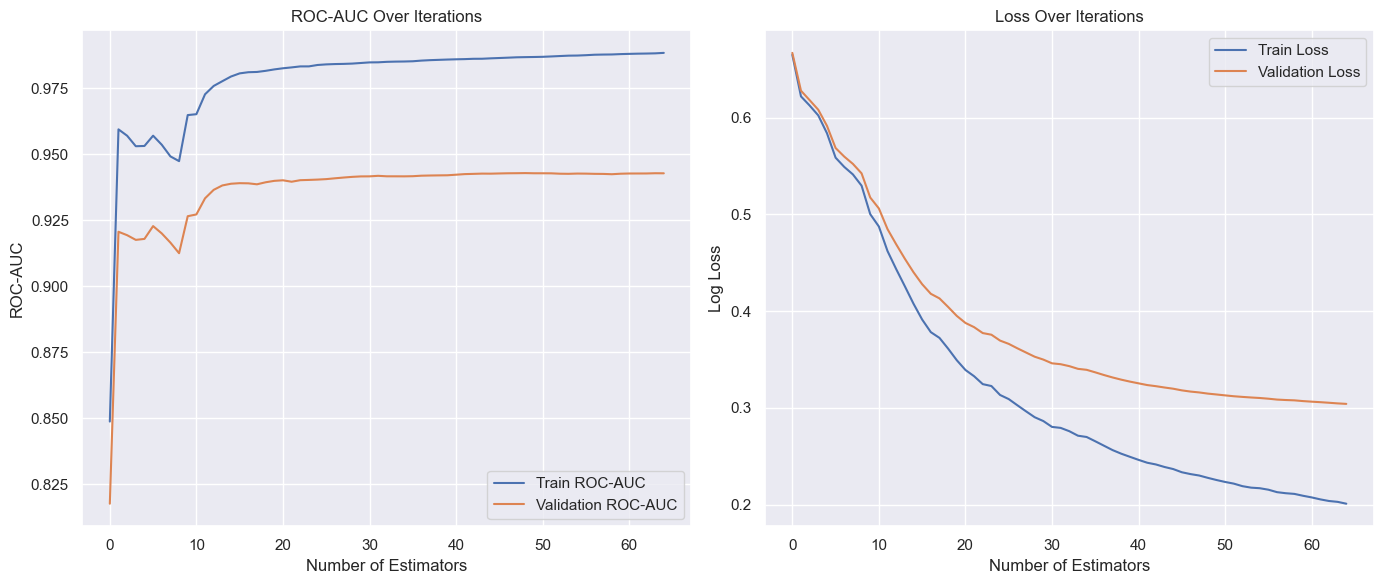

Train ROC-AUC: 0.9883219410403326
Valid ROC-AUC: 0.9427445637207832
Test  ROC-AUC: 0.9387539893847333


In [22]:
optimal_boosting = Boosting(
    n_estimators=best_params["n_estimators"],
    learning_rate=best_params["learning_rate"],
    eval_set=(X_valid, y_valid),
    early_stopping_rounds=10,
    bootstrap_type='Bernoulli',
    subsample=best_params["subsample"],
    rsm=best_params["rsm"],
    base_model_params={
        "max_depth": best_params["max_depth"],
    }
)

optimal_boosting.fit(X_train, y_train, plot=True)

print("Train ROC-AUC:", optimal_boosting.score(X_train, y_train))
print("Valid ROC-AUC:", optimal_boosting.score(X_valid, y_valid))
print("Test  ROC-AUC:", optimal_boosting.score(X_test,  y_test))


In [23]:
default_boosting = Boosting(
    n_estimators=50,
    learning_rate=0.1,
    base_model_params={},
)

default_boosting.fit(X_train, y_train, plot=False)

print("Default model Valid ROC-AUC:", default_boosting.score(X_valid, y_valid))
print("Optimal model Valid ROC-AUC:", optimal_boosting.score(X_valid, y_valid))


Estimator 1/50 - Train AUC: 0.9998 - Train Loss: 0.6689
Estimator 2/50 - Train AUC: 0.9998 - Train Loss: 0.6459
Estimator 3/50 - Train AUC: 0.9998 - Train Loss: 0.6240
Estimator 4/50 - Train AUC: 0.9998 - Train Loss: 0.6031
Estimator 5/50 - Train AUC: 0.9998 - Train Loss: 0.5833
Estimator 6/50 - Train AUC: 0.9998 - Train Loss: 0.5645
Estimator 7/50 - Train AUC: 0.9998 - Train Loss: 0.5465
Estimator 8/50 - Train AUC: 0.9998 - Train Loss: 0.5295
Estimator 9/50 - Train AUC: 0.9998 - Train Loss: 0.5132
Estimator 10/50 - Train AUC: 0.9998 - Train Loss: 0.4977
Estimator 11/50 - Train AUC: 0.9998 - Train Loss: 0.4830
Estimator 12/50 - Train AUC: 0.9998 - Train Loss: 0.4689
Estimator 13/50 - Train AUC: 0.9998 - Train Loss: 0.4555
Estimator 14/50 - Train AUC: 0.9998 - Train Loss: 0.4427
Estimator 15/50 - Train AUC: 0.9998 - Train Loss: 0.4305
Estimator 16/50 - Train AUC: 0.9998 - Train Loss: 0.4189
Estimator 17/50 - Train AUC: 0.9998 - Train Loss: 0.4077
Estimator 18/50 - Train AUC: 0.9998 - Tr

In [24]:
optuna.visualization.plot_param_importances(study).show()

optuna.visualization.plot_slice(study, params=["learning_rate"]).show()


### 3.2. Глубокая оптимизация (1 балл)

Помимо эффективного перебора гиперпараметров, `optuna` предлагает более тонкий контроль над самой процедурой обучения. Улучшите процедуру оптимизации следующим образом:

1. Посмотрите, как в `optuna` устроена запись в хранилища, и добавьте это в пайплайн оптимизации. Без указания БД все запуски оптуны сотрутся, как только закончится сессия. Более того, так можно распараллелить процесс оптимизации на несколько машин
2. Посмотрите, как можно контролировать процесс обучения бустинга при помощи прунера. У библиотечных имплементаций есть уже готовые, их можно использовать пунктом ниже. Для кастомной модели возьмите что-то из `optuna.pruners`. Идея прунера — не обучать бустинг до конца, если по истории видно, что другие бустинги на этом этапе статистически лучше.
3. Добавьте сохранение истории функции потерь и времени обучения в качестве `user_attribute` сразу в `study`. Мы не хотим оптимизировать их напрямую, но они нам понадобится для сравнения моделей в дальнейшем

Добавьте хранилище и юзер атрибуты и посмотрите, ускорилась ли оптимизация с добавлением прунера

In [25]:
storage_url = "sqlite:///my_study.db"

study = optuna.create_study(
    study_name="my_custom_boosting",
    direction="maximize",
    storage=storage_url,
    load_if_exists=True
)

[I 2024-12-24 01:54:53,368] Using an existing study with name 'my_custom_boosting' instead of creating a new one.


In [26]:
from optuna.pruners import MedianPruner

pruner = MedianPruner(
    n_startup_trials=5,
    n_warmup_steps=2,
    interval_steps=1
)

study = optuna.create_study(
    study_name="my_custom_boosting",
    direction="maximize",
    storage="sqlite:///my_study.db",
    load_if_exists=True,
    pruner=pruner
)

[I 2024-12-24 01:54:53,528] Using an existing study with name 'my_custom_boosting' instead of creating a new one.


In [27]:
import time

from sklearn.metrics import roc_auc_score

def objective(trial: optuna.Trial) -> float:
    """
    Функция, которую будет вызывать optuna.
    Мы хотим МАКСИМИЗИРОВАТЬ ROC-AUC,
    так что вернём это значение (или -val_auc, если study.direction='minimize').
    При этом добавим прунинг.
    Запишем время обучения, историю и т.д. как user_attr.
    """

    n_estimators = trial.suggest_int("n_estimators", 10, 150)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.5, log=True)
    max_depth = trial.suggest_int("max_depth", 2, 10)
    subsample = trial.suggest_float("subsample", 0.5, 1.0)
    rsm = trial.suggest_float("rsm", 0.5, 1.0)

    boosting = Boosting(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        eval_set=(X_valid, y_valid),
        early_stopping_rounds=10,
        bootstrap_type='Bernoulli',
        subsample=subsample,
        rsm=rsm,
        base_model_params={
            "max_depth": max_depth,
        }
    )

    start_time = time.time()

    train_predictions = np.zeros_like(y_train, dtype=float)
    val_predictions   = np.zeros_like(y_valid, dtype=float)

    no_improvement_count = 0
    best_val_loss_local = float("inf")

    train_loss_history = []
    val_loss_history   = []

    for iter_ in range(n_estimators):

        boosting.partial_fit(X_train, y_train, train_predictions, selected_features=None)
        train_loss = boosting.loss_fn(y_train, train_predictions)
        train_loss_history.append(train_loss)
        model, feats = boosting.models[-1]
        gamma = boosting.gammas[-1]

        if feats is None or len(feats) == 0:
            X_val_rsm = X_valid
        else:
            X_val_rsm = X_valid[:, feats]

        base_pred_val = model.predict(X_val_rsm)
        val_predictions += boosting.learning_rate * gamma * base_pred_val
        val_loss = boosting.loss_fn(y_valid, val_predictions)
        val_loss_history.append(val_loss)

        if val_loss < best_val_loss_local:
            best_val_loss_local = val_loss
            no_improvement_count = 0
        else:
            no_improvement_count += 1
            if no_improvement_count >= (boosting.early_stopping_rounds or 0):
                print(f"Early stopping on iteration {iter_+1}")
                break

        trial.report(-val_loss, step=iter_)

        if trial.should_prune():
            print("Trial pruned on iteration", iter_+1)
            raise optuna.TrialPruned()

    train_time = time.time() - start_time

    val_auc = roc_auc_score(y_valid, boosting.sigmoid(val_predictions))

    trial.set_user_attr("train_time", train_time)
    trial.set_user_attr("train_loss_history", train_loss_history)
    trial.set_user_attr("val_loss_history",   val_loss_history)

    print(f"[Trial {trial.number}] done with val_auc={val_auc:.4f}, train_time={train_time:.2f}s")

    return val_auc

In [28]:
from optuna.pruners import MedianPruner
pruner = MedianPruner(n_startup_trials=5, n_warmup_steps=2)

study = optuna.create_study(
    study_name="my_custom_boosting",
    direction="maximize",
    storage="sqlite:///my_study.db",
    load_if_exists=True,
    pruner=pruner
)

study.optimize(objective, n_trials=50)

print("Best trial:", study.best_trial.number)
print("Best value (val_auc):", study.best_value)
print("Best params:", study.best_params)

study.set_user_attr("description", "Experiment with median pruner, 50 trials")

[I 2024-12-24 01:54:53,806] Using an existing study with name 'my_custom_boosting' instead of creating a new one.
[I 2024-12-24 01:54:54,843] Trial 1051 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:54:55,191] Trial 1052 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:54:55,534] Trial 1053 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:54:55,851] Trial 1054 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:54:56,193] Trial 1055 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:54:56,712] Trial 1056 pruned. 


Trial pruned on iteration 6


[I 2024-12-24 01:54:57,016] Trial 1057 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:54:57,365] Trial 1058 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:54:57,669] Trial 1059 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:54:57,981] Trial 1060 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:54:58,298] Trial 1061 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:54:58,613] Trial 1062 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:54:58,931] Trial 1063 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:54:59,232] Trial 1064 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:54:59,559] Trial 1065 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:55:02,669] Trial 1066 pruned. 


Trial pruned on iteration 40


[I 2024-12-24 01:55:02,991] Trial 1067 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:55:03,328] Trial 1068 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:55:06,898] Trial 1069 pruned. 


Trial pruned on iteration 57


[I 2024-12-24 01:55:07,170] Trial 1070 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:55:07,559] Trial 1071 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:55:07,877] Trial 1072 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:55:08,193] Trial 1073 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:55:08,556] Trial 1074 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:55:08,876] Trial 1075 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:55:09,195] Trial 1076 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:55:09,514] Trial 1077 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:55:09,826] Trial 1078 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:55:10,179] Trial 1079 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:55:12,267] Trial 1080 pruned. 


Trial pruned on iteration 29


[I 2024-12-24 01:55:12,590] Trial 1081 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:55:12,910] Trial 1082 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:55:13,200] Trial 1083 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:55:18,680] Trial 1084 finished with value: 0.9432330566005205 and parameters: {'n_estimators': 105, 'learning_rate': 0.4993500325201463, 'max_depth': 6, 'subsample': 0.6829560648163723, 'rsm': 0.9007382994918597}. Best is trial 203 with value: 0.9436936127959592.


Early stopping on iteration 80
[Trial 1084] done with val_auc=0.9432, train_time=5.34s


[I 2024-12-24 01:55:18,993] Trial 1085 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:55:19,319] Trial 1086 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:55:19,630] Trial 1087 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:55:19,939] Trial 1088 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:55:20,276] Trial 1089 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:55:20,592] Trial 1090 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:55:20,936] Trial 1091 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:55:21,250] Trial 1092 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:55:21,525] Trial 1093 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:55:21,909] Trial 1094 pruned. 


Trial pruned on iteration 4


[I 2024-12-24 01:55:22,204] Trial 1095 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:55:22,563] Trial 1096 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:55:22,924] Trial 1097 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:55:23,448] Trial 1098 pruned. 


Trial pruned on iteration 6


[I 2024-12-24 01:55:23,756] Trial 1099 pruned. 


Trial pruned on iteration 3


[I 2024-12-24 01:55:24,071] Trial 1100 pruned. 


Trial pruned on iteration 3
Best trial: 203
Best value (val_auc): 0.9436936127959592
Best params: {'n_estimators': 90, 'learning_rate': 0.4949579049620699, 'max_depth': 6, 'subsample': 0.692666320072717, 'rsm': 0.9392824245466471}


In [29]:
print("Best trial:", study.best_trial.number)
print("Best value:", study.best_value)
print("Best params:", study.best_params)

Best trial: 203
Best value: 0.9436936127959592
Best params: {'n_estimators': 90, 'learning_rate': 0.4949579049620699, 'max_depth': 6, 'subsample': 0.692666320072717, 'rsm': 0.9392824245466471}


In [30]:
print(study.user_attrs)

for t in study.trials:
    print(t.number, t.user_attrs.keys())

{'description': 'Experiment with median pruner, 50 trials'}
0 dict_keys(['train_loss_history', 'train_time', 'val_loss_history'])
1 dict_keys(['train_loss_history', 'train_time', 'val_loss_history'])
2 dict_keys(['train_loss_history', 'train_time', 'val_loss_history'])
3 dict_keys(['train_loss_history', 'train_time', 'val_loss_history'])
4 dict_keys(['train_loss_history', 'train_time', 'val_loss_history'])
5 dict_keys(['train_loss_history', 'train_time', 'val_loss_history'])
6 dict_keys([])
7 dict_keys([])
8 dict_keys(['train_loss_history', 'train_time', 'val_loss_history'])
9 dict_keys([])
10 dict_keys(['train_loss_history', 'train_time', 'val_loss_history'])
11 dict_keys(['train_loss_history', 'train_time', 'val_loss_history'])
12 dict_keys([])
13 dict_keys(['train_loss_history', 'train_time', 'val_loss_history'])
14 dict_keys([])
15 dict_keys([])
16 dict_keys([])
17 dict_keys(['train_loss_history', 'train_time', 'val_loss_history'])
18 dict_keys([])
19 dict_keys([])
20 dict_keys(['t

In [31]:
import optuna.visualization

fig = optuna.visualization.plot_param_importances(study)
fig.show()

fig2 = optuna.visualization.plot_slice(study, params=["n_estimators", "learning_rate"])
fig2.show()

### 3.3. Готовые реализации (1 балл)

Библиотек для бустингов существует много, но активно используются лишь три. Ваша задача — попробовать их в деле, посмотреть на их уникальные фишки и понять, что вам нравится больше всего

Возьмите любую из популярных библиотек: <font color='lightblue'>`xgboost`</font>, <font color='lightgreen'>`lightgbm`</font>, <font color='palegoldenrod'>`catboost`</font>.
Ваша задача — взять одну из них, подобрать те же оптимальные параметры, что и выше, плюс что-то, что вам понравилось в них больше всего (может быть абсолютно любая фишка из пунктов выше или что-то, что вы найдете сами, не обязательно эксклюзивное), и сравнить две оптимизированные модели по
- динамике функции потерь (на обучающей и на валидационной выборке)
- времени обучения

In [32]:
import xgboost as xgb

y_train_xgb = (y_train == 1).astype(np.int32)
y_valid_xgb = (y_valid == 1).astype(np.int32)
y_test_xgb  = (y_test  == 1).astype(np.int32)

In [33]:
y_train_01 = (y_train == 1).astype(int)
y_valid_01 = (y_valid == 1).astype(int)
y_test_01  = (y_test  == 1).astype(int)

dtrain = xgb.DMatrix(X_train, label=y_train_01)
dvalid = xgb.DMatrix(X_valid, label=y_valid_01)
dtest  = xgb.DMatrix(X_test,  label=y_test_01)

params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "max_depth": 5,
    "eta": 0.1,
    "subsample": 0.8,
    "colsample_bytree": 0.5,
    "seed": 1337,
}

num_round = 50

eval_list = [(dtrain, "train"), (dvalid, "eval")]

start_time = time.time()
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=num_round,
    evals=eval_list,
    early_stopping_rounds=10,
    verbose_eval=True
)
train_time = time.time() - start_time

print(f"XGBoost training took {train_time:.2f} seconds")


[0]	train-logloss:0.62359	eval-logloss:0.62316
[1]	train-logloss:0.56986	eval-logloss:0.57382
[2]	train-logloss:0.53120	eval-logloss:0.53893
[3]	train-logloss:0.51701	eval-logloss:0.52605
[4]	train-logloss:0.49460	eval-logloss:0.50598
[5]	train-logloss:0.48236	eval-logloss:0.49505
[6]	train-logloss:0.47781	eval-logloss:0.49121
[7]	train-logloss:0.47289	eval-logloss:0.48686
[8]	train-logloss:0.45698	eval-logloss:0.47315
[9]	train-logloss:0.45243	eval-logloss:0.46885
[10]	train-logloss:0.42717	eval-logloss:0.44675
[11]	train-logloss:0.40339	eval-logloss:0.42644
[12]	train-logloss:0.40154	eval-logloss:0.42472
[13]	train-logloss:0.39649	eval-logloss:0.42085
[14]	train-logloss:0.39373	eval-logloss:0.41849
[15]	train-logloss:0.39074	eval-logloss:0.41586
[16]	train-logloss:0.38138	eval-logloss:0.40778
[17]	train-logloss:0.36482	eval-logloss:0.39346
[18]	train-logloss:0.34851	eval-logloss:0.38014
[19]	train-logloss:0.33574	eval-logloss:0.36958
[20]	train-logloss:0.32969	eval-logloss:0.36464
[2

In [34]:
pred_test = bst.predict(dtest)

from sklearn.metrics import roc_auc_score
xgb_test_auc = roc_auc_score(y_test_01, pred_test)
print(f"XGBoost test ROC-AUC = {xgb_test_auc:.4f}")


XGBoost test ROC-AUC = 0.9382


In [35]:
import numpy as np
logloss_test = -(y_test_01 * np.log(pred_test) + (1-y_test_01)*np.log(1-pred_test)).mean()
print(f"XGBoost test logloss = {logloss_test:.4f}")


XGBoost test logloss = 0.3032


In [36]:
evals_result = {}
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=num_round,
    evals=eval_list,
    early_stopping_rounds=10,
    evals_result=evals_result,
    verbose_eval=False
)


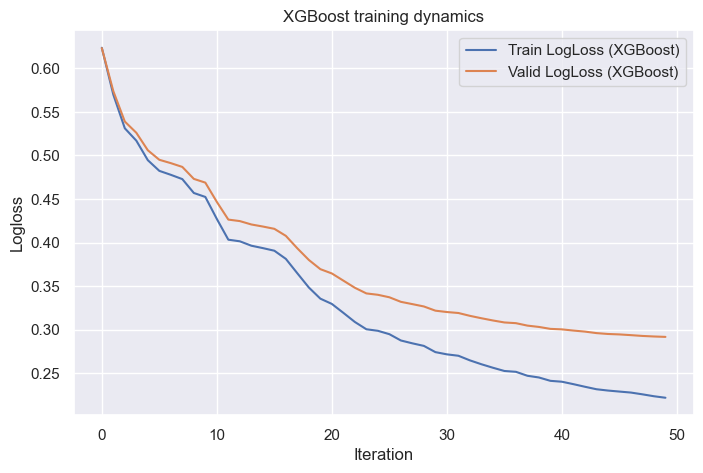

In [37]:
import matplotlib.pyplot as plt

train_logloss = evals_result['train']['logloss']
valid_logloss = evals_result['eval']['logloss']

plt.figure(figsize=(8,5))
plt.plot(train_logloss, label="Train LogLoss (XGBoost)")
plt.plot(valid_logloss, label="Valid LogLoss (XGBoost)")
plt.xlabel("Iteration")
plt.ylabel("Logloss")
plt.legend()
plt.title("XGBoost training dynamics")
plt.show()


In [38]:
my_boosting = Boosting(
    n_estimators=50,
    learning_rate=0.1,
    subsample=0.8,
    rsm=0.5,
)
start_time_2 = time.time()
my_boosting.fit(X_train, y_train, X_val=X_valid, y_val=y_valid, plot=False)
my_train_time = time.time() - start_time_2

test_auc_my = my_boosting.score(X_test, y_test)


Estimator 1/50 - Train AUC: 0.7588 - Train Loss: 0.6866 - Val AUC: 0.7380 - Val Loss: 0.6870
Estimator 2/50 - Train AUC: 0.8546 - Train Loss: 0.6771 - Val AUC: 0.8139 - Val Loss: 0.6786
Estimator 3/50 - Train AUC: 0.8489 - Train Loss: 0.6715 - Val AUC: 0.8119 - Val Loss: 0.6733
Estimator 4/50 - Train AUC: 0.8454 - Train Loss: 0.6650 - Val AUC: 0.8099 - Val Loss: 0.6673
Estimator 5/50 - Train AUC: 0.8720 - Train Loss: 0.6551 - Val AUC: 0.8277 - Val Loss: 0.6590
Estimator 6/50 - Train AUC: 0.9306 - Train Loss: 0.6392 - Val AUC: 0.8672 - Val Loss: 0.6470
Estimator 7/50 - Train AUC: 0.9290 - Train Loss: 0.6326 - Val AUC: 0.8685 - Val Loss: 0.6411
Estimator 8/50 - Train AUC: 0.9254 - Train Loss: 0.6269 - Val AUC: 0.8667 - Val Loss: 0.6358
Estimator 9/50 - Train AUC: 0.9255 - Train Loss: 0.6194 - Val AUC: 0.8665 - Val Loss: 0.6295
Estimator 10/50 - Train AUC: 0.9662 - Train Loss: 0.6004 - Val AUC: 0.8920 - Val Loss: 0.6163
Estimator 11/50 - Train AUC: 0.9725 - Train Loss: 0.5890 - Val AUC: 0

In [39]:
print(f"XGBoost train time: {train_time:.2f}s, test AUC={xgb_test_auc:.4f}")
print(f"MyBoosting train time: {my_train_time:.2f}s, test AUC={test_auc_my:.4f}")


XGBoost train time: 0.20s, test AUC=0.9382
MyBoosting train time: 10.52s, test AUC=0.9293


<font color='plum'>**Вопрос:** Какая архитектура вам нравится больше всего и почему?</font>

<font color='plum'>**Ответ**: Мне больше всего нравится LightGBM, потому что он, как правило, даёт довольно быстрое обучение на больших датасетах, при этом сохраняет хорошее качество и имеет удобную реализацию GOSS-бутстрапа. </font>

### Бонус. Random Forest (0.5 балла)

Если очень захотеть, оптуна может оптимизировать все, что угодно, даже нейросети. Давайте противопоставим бустингу его злейшего врага — алгоритм Random Forest.

Возьмите реализацию случайного леса из <font color='lightgreen'>`lightgbm`</font>. Посмотрите, какие там есть гиперпараметры, переберите что-либо из них вместе с `max_depth` и `n_estimators`.

Сравните его качество и динамику функции потерь (на обучающей и на валидационной выборке) с таковыми у бустинга и сделайте вывод, а нужен ли Random Forest?

In [45]:
import lightgbm as lgb

y_train_rf = (y_train == 1).astype(int)
y_valid_rf = (y_valid == 1).astype(int)
y_test_rf  = (y_test  == 1).astype(int)

dtrain = lgb.Dataset(X_train, label=y_train_rf)
dvalid = lgb.Dataset(X_valid, label=y_valid_rf, reference=dtrain)

def objective_rf(trial: optuna.Trial) -> float:
    params = {
        "boosting_type": "rf",
        "objective": "binary",
        "metric": "binary_logloss",
        "learning_rate": 0.1,
        "verbosity": -1,
        "num_leaves": trial.suggest_int("num_leaves", 16, 128),
        "max_depth": trial.suggest_int("max_depth", 2, 12),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.6, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 5),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.6, 1.0),
        "n_jobs": -1,
        "seed": 1337
    }

    n_estimators = trial.suggest_int("n_estimators", 10, 200)

    dtrain = lgb.Dataset(X_train, label=y_train_rf)

    start_time = time.time()
    gbm = lgb.train(
        params,
        dtrain,
        num_boost_round=n_estimators
        
    )
    train_time = time.time() - start_time

    pred_val = gbm.predict(X_valid)
    val_auc = roc_auc_score(y_valid_rf, pred_val)

    trial.set_user_attr("train_time", train_time)

    return val_auc


study_rf = optuna.create_study(
    study_name="lgbm_rf_opt",
    direction="maximize",
    storage="sqlite:///lgbm_rf_opt.db",
    load_if_exists=True
)
study_rf.optimize(objective_rf, n_trials=30)

print("Best trial:", study_rf.best_trial.number)
print("Best value (val_auc):", study_rf.best_value)
print("Best params:", study_rf.best_params)

[I 2024-12-24 02:05:39,881] Using an existing study with name 'lgbm_rf_opt' instead of creating a new one.
[I 2024-12-24 02:05:40,199] Trial 152 finished with value: 0.9421523060136506 and parameters: {'num_leaves': 103, 'max_depth': 10, 'bagging_fraction': 0.9245981950130224, 'bagging_freq': 1, 'feature_fraction': 0.6189323974483613, 'n_estimators': 10}. Best is trial 150 with value: 0.9423773958700001.
[I 2024-12-24 02:05:40,469] Trial 153 finished with value: 0.9414479024738333 and parameters: {'num_leaves': 103, 'max_depth': 10, 'bagging_fraction': 0.9088735703596512, 'bagging_freq': 1, 'feature_fraction': 0.6211721921082437, 'n_estimators': 10}. Best is trial 150 with value: 0.9423773958700001.
[I 2024-12-24 02:05:40,745] Trial 154 finished with value: 0.939942913381113 and parameters: {'num_leaves': 103, 'max_depth': 9, 'bagging_fraction': 0.9071266695628395, 'bagging_freq': 1, 'feature_fraction': 0.6129386646923011, 'n_estimators': 11}. Best is trial 150 with value: 0.9423773958

Best trial: 150
Best value (val_auc): 0.9423773958700001
Best params: {'num_leaves': 106, 'max_depth': 11, 'bagging_fraction': 0.9251295536303074, 'bagging_freq': 1, 'feature_fraction': 0.6190273099552982, 'n_estimators': 10}


In [46]:
best_params_rf = study_rf.best_params
params_rf = {
    "boosting_type": "rf",
    "objective": "binary",
    "metric": "binary_logloss",
    "learning_rate": 0.1,
    "num_leaves": best_params_rf["num_leaves"],
    "max_depth": best_params_rf["max_depth"],
    "bagging_fraction": best_params_rf["bagging_fraction"],
    "bagging_freq": best_params_rf["bagging_freq"],
    "feature_fraction": best_params_rf["feature_fraction"],
    "seed": 1337
}

num_round_rf = best_params_rf["n_estimators"]

evals_result_rf = {}
start_rf = time.time()

gbm_rf_final = lgb.train(
    params_rf,
    dtrain,
    num_boost_round=num_round_rf,
    valid_sets=[dtrain, dvalid],
    valid_names=["train", "valid"],
)

train_time_rf = time.time() - start_rf


print(f"\nLightGBM RF training took {train_time_rf:.2f} s.")
pred_test_rf = gbm_rf_final.predict(X_test)
test_auc_rf = roc_auc_score(y_test_rf, pred_test_rf)
test_logloss_rf = log_loss(y_test_rf, pred_test_rf)
print(f"LightGBM RF test AUC = {test_auc_rf:.4f}")
print(f"LightGBM RF test logloss = {test_logloss_rf:.4f}")


LightGBM RF training took 0.18 s.
LightGBM RF test AUC = 0.9352
LightGBM RF test logloss = 0.3575


в большинстве табличных задач градиентный бустинг показывает более высокое качество, чем случайный лес, особенно при тщательном подборе гиперпараметров. Однако Random Forest проще в настройке, иногда быстрее обучается, а для некоторых типов данных может оказаться не хуже бустинга. Поэтому его стоит держать под рукой хотя бы для сравнения или в качестве дополнительной модели в ансамбле.

### 3.4. Бустинг и вероятности (0.5 балла)

С качеством мы более-менее разобрались, но что насчет вероятностей? Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности?

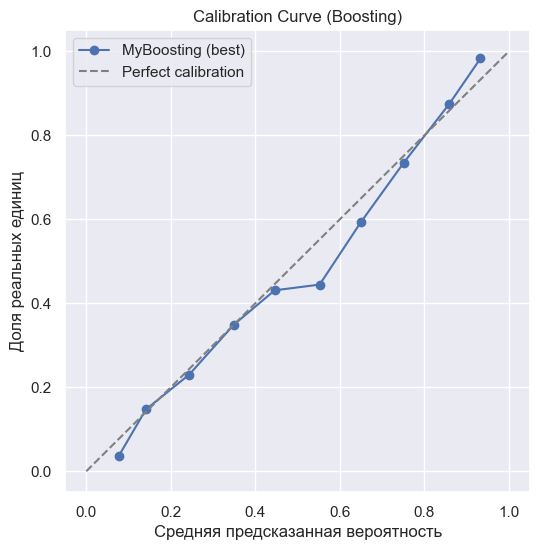

In [41]:
from sklearn.calibration import calibration_curve

y_test_01 = (y_test == 1).astype(int)

probs_boost = optimal_boosting.predict_proba(X_test)[:, 1]

fraction_of_positives, mean_predicted_value = calibration_curve(
    y_test_01,
    probs_boost,
    n_bins=10,
    strategy='uniform'
)

plt.figure(figsize=(6,6))
plt.plot(mean_predicted_value, fraction_of_positives, 'o-', label='MyBoosting (best)')

plt.plot([0,1], [0,1], '--', color='gray', label='Perfect calibration')

plt.xlabel('Средняя предсказанная вероятность')
plt.ylabel('Доля реальных единиц')
plt.title('Calibration Curve (Boosting)')
plt.legend()
plt.show()



Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

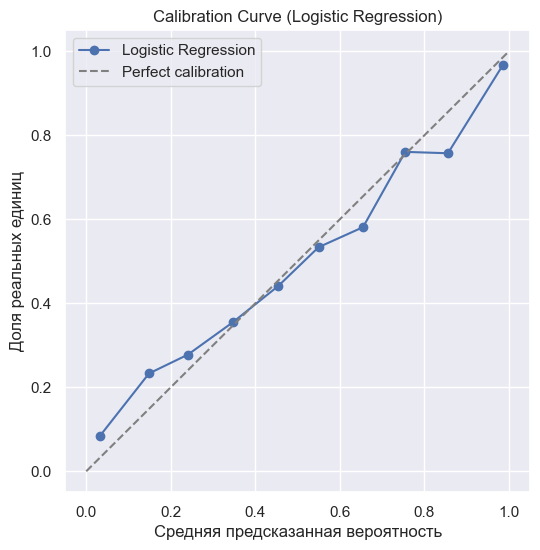

In [42]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=1337)
lr.fit(X_train, (y_train == 1).astype(int))

probs_lr = lr.predict_proba(X_test)[:, 1]
fraction_of_positives_lr, mean_pred_value_lr = calibration_curve(
    (y_test == 1).astype(int),
    probs_lr,
    n_bins=10,
    strategy='uniform'
)

plt.figure(figsize=(6,6))
plt.plot(mean_pred_value_lr, fraction_of_positives_lr, 'o-', label='Logistic Regression')
plt.plot([0,1], [0,1], '--', color='gray', label='Perfect calibration')
plt.xlabel('Средняя предсказанная вероятность')
plt.ylabel('Доля реальных единиц')
plt.title('Calibration Curve (Logistic Regression)')
plt.legend()
plt.show()


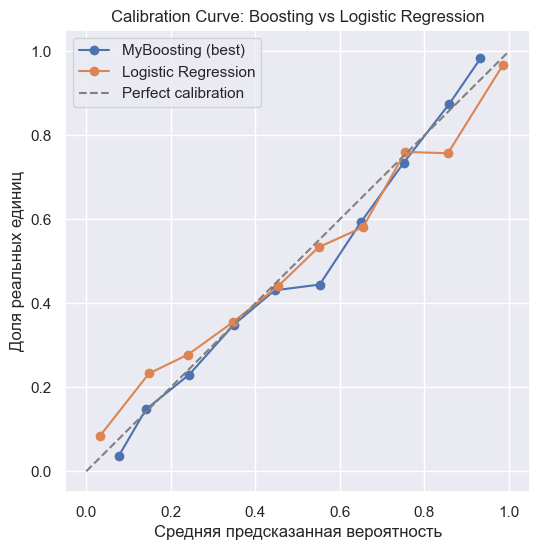

In [43]:
plt.figure(figsize=(6,6))
plt.plot(mean_predicted_value, fraction_of_positives, 'o-', label='MyBoosting (best)')
plt.plot(mean_pred_value_lr, fraction_of_positives_lr, 'o-', label='Logistic Regression')

plt.plot([0,1], [0,1], '--', color='gray', label='Perfect calibration')
plt.xlabel('Средняя предсказанная вероятность')
plt.ylabel('Доля реальных единиц')
plt.title('Calibration Curve: Boosting vs Logistic Regression')
plt.legend()
plt.show()


## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2025 года?

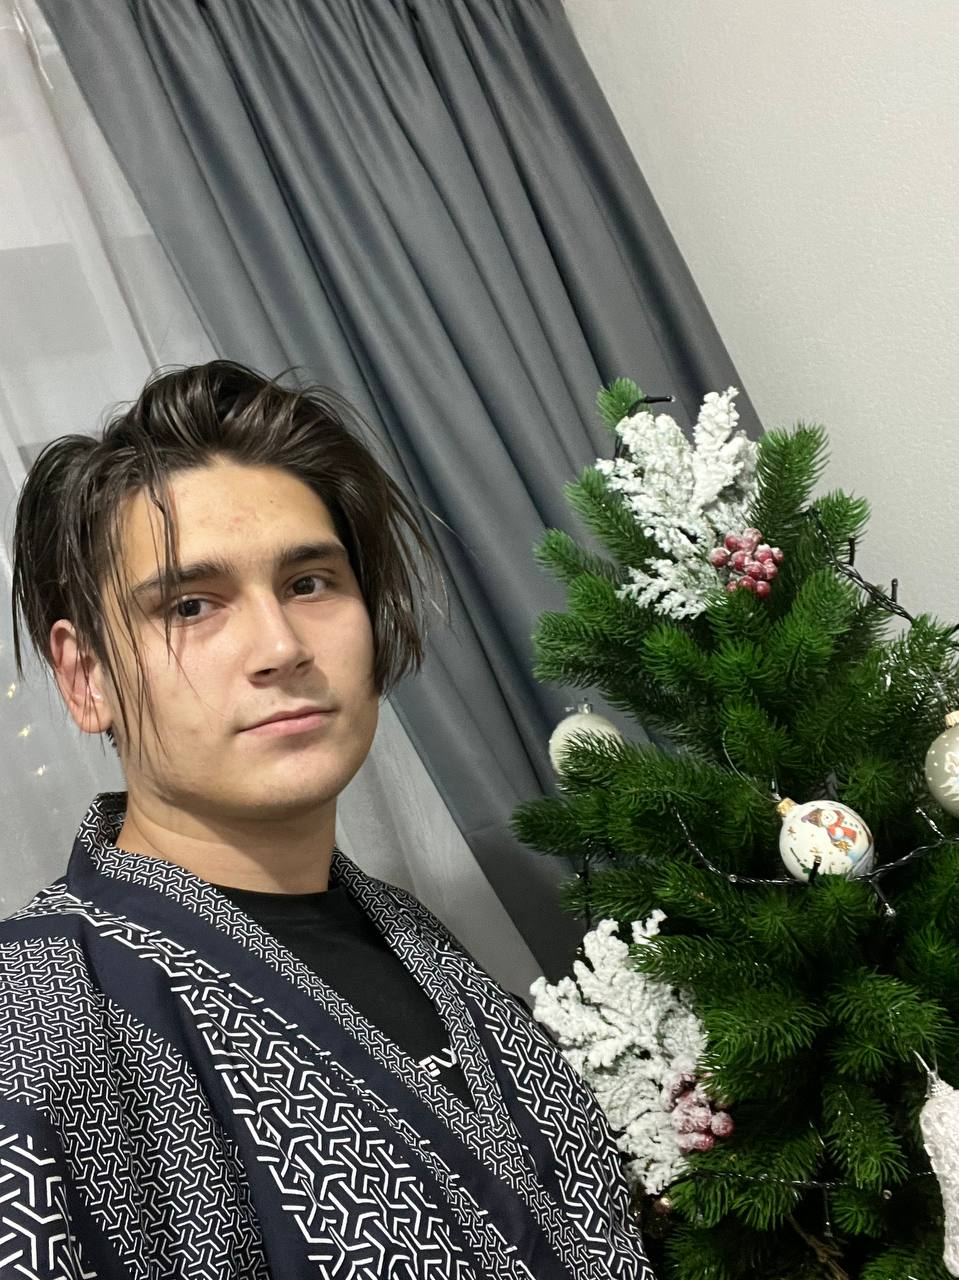

Так я выгляжу к концу семестра хахах. Желаю Яндекс Ml 300к наносек, и еще больше поводов не высыпаться))